In [ ]:
#Topic: ckd prediction using MACHINE LEARNING TECHNIQUES such as DT, RF, Logreg SVM and ANN

In [ ]:
# import liberaries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import keras as k
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
# from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_theme(style="whitegrid")
style.use('seaborn')

In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()
df= pd.read_csv('kidney_disease.csv')
df.head()

Saving kidney_disease.csv to kidney_disease.csv


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.shape


(400, 25)

Starting With Conventional Data Cleaning Procedures

In [ ]:
df.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# filing 9 NAN indices of 'age' col with its average value
avgage = round(df['age'].mean(), 2)
df['age'].fillna(avgage, inplace=True)
df.isna().sum()

age                 0
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# Similarly filing 12 NAN indices of 'bp' col with its average value
avgbp = round(df['bp'].mean(), 2)
df['bp'].fillna(avgbp, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# filing 47 NAN indices of 'sg' col with its average value
avgsg = round(df['sg'].mean(), 2)
df['sg'].fillna(avgsg, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# df['al'].dtypes
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
# filing 46 NAN indices of 'al' col with its average value
avgal = round(df['al'].mean(), 2)
df['al'].fillna(avgal, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:

# filing 49 NAN indices of 'su' col with its average value
avgsu = round(df['su'].mean(), 2)
df['su'].fillna(avgsu, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df['rbc'].unique().tolist()


[nan, 'normal', 'abnormal']

In [ ]:
df.drop(['rbc'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'classification'],
      dtype='object')

Droping initially less important Columns

In [ ]:
df['ba'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [ ]:
df.drop(['pc', 'pcc', 'ba'], axis=1, inplace=True)

In [ ]:

df.shape

(400, 21)

In [ ]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# Let's fill again 44 NAN indices of numeric 'bgr' col with its average value
avgbgr = round(df['bgr'].mean(), 2)
df['bgr'].fillna(avgbgr, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# filling 19 NAN indices of col 'bu' with its average value
avgbu = round(df['bu'].mean(), 2)
df['bu'].fillna(avgbu, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# filling 17 NAN indices of col 'sc' with its average value
avgsc = round(df['sc'].mean(), 2)
df['sc'].fillna(avgsc, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# again filling 87 NAN indices of col 'sod' with its average value
avgsod = round(df['sod'].mean(), 2)
df['sod'].fillna(avgsod, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# filling 88 NAN indices of col 'pot' with its average value
avgpot = round(df['pot'].mean(), 2)
df['pot'].fillna(avgpot, inplace=True)
df.isna().sum()


age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# filling 52 NAN indices of col 'hemo' with its average value
avghemo = round(df['hemo'].mean(), 2)
df['hemo'].fillna(avghemo, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [ ]:
df['pcv'].replace('\t?', '0', inplace=True)

In [ ]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '0', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [ ]:
df['pcv'].replace('\t43', '43', inplace=True)

In [ ]:
df['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '0', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [ ]:
df['pcv'].dtypes

dtype('O')

In [ ]:

df['pcv'] = df['pcv'].astype(float)

In [ ]:

df['pcv'].dtypes

dtype('float64')

In [ ]:
df['pcv'].isna().sum()

70

In [ ]:

# Now, filling 70 NAN indices of col 'pcv' with its average value
avgpcv = round(df['pcv'].mean(), 2)
df['pcv'].fillna(avgpcv, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:












df['pcv'].unique()

array([44.  , 38.  , 31.  , 32.  , 35.  , 39.  , 36.  , 33.  , 29.  ,
       28.  , 38.77, 16.  , 24.  , 37.  , 30.  , 34.  , 40.  , 45.  ,
       27.  , 48.  ,  0.  , 52.  , 14.  , 22.  , 18.  , 42.  , 17.  ,
       46.  , 23.  , 19.  , 25.  , 41.  , 26.  , 15.  , 21.  , 43.  ,
       20.  , 47.  ,  9.  , 49.  , 50.  , 53.  , 51.  , 54.  ])

In [ ]:
















df['pcv'].replace(0, avgpcv, inplace=True)

In [ ]:






df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [ ]:
df['wc'].replace("\t?", "0", inplace=True)

In [ ]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '0', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [ ]:
df['wc'].replace("\t6200", "6200", inplace=True)

In [ ]:
df['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '\t8400', '10500', '4200', '4700',
       '10900', '8100', '9500', '2200', '12800', '11200', '19100', '0',
       '12300', '16700', '2600', '26400', '8800', '7400', '4900', '8000',
       '12000', '15700', '4100', '5700', '11500', '5400', '10800', '9900',
       '5200', '5900', '9300', '9700', '5100', '6600'], dtype=object)

In [ ]:
df['wc'].replace("\t8400", "8400", inplace=True)

In [ ]:
df['wc'].dtypes

dtype('O')

In [ ]:
df['wc'] = df['wc'].astype(float)

In [ ]:






























df['wc'].dtypes

dtype('float64')

In [ ]:
df['wc'].isna().sum()

105

In [ ]:

# Again, filling 105 NAN indices of col 'wc' with its average value
avgwc = round(df['wc'].mean(), 2)
df['wc'].fillna(avgwc, inplace=True)
df.isna().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df['wc'].unique()

array([ 7800.  ,  6000.  ,  7500.  ,  6700.  ,  7300.  ,  8377.63,
        6900.  ,  9600.  , 12100.  ,  4500.  , 12200.  , 11000.  ,
        3800.  , 11400.  ,  5300.  ,  9200.  ,  6200.  ,  8300.  ,
        8400.  , 10300.  ,  9800.  ,  9100.  ,  7900.  ,  6400.  ,
        8600.  , 18900.  , 21600.  ,  4300.  ,  8500.  , 11300.  ,
        7200.  ,  7700.  , 14600.  ,  6300.  ,  7100.  , 11800.  ,
        9400.  ,  5500.  ,  5800.  , 13200.  , 12500.  ,  5600.  ,
        7000.  , 11900.  , 10400.  , 10700.  , 12700.  ,  6800.  ,
        6500.  , 13600.  , 10200.  ,  9000.  , 14900.  ,  8200.  ,
       15200.  ,  5000.  , 16300.  , 12400.  , 10500.  ,  4200.  ,
        4700.  , 10900.  ,  8100.  ,  9500.  ,  2200.  , 12800.  ,
       11200.  , 19100.  ,     0.  , 12300.  , 16700.  ,  2600.  ,
       26400.  ,  8800.  ,  7400.  ,  4900.  ,  8000.  , 12000.  ,
       15700.  ,  4100.  ,  5700.  , 11500.  ,  5400.  , 10800.  ,
        9900.  ,  5200.  ,  5900.  ,  9300.  ,  9700.  ,  5100

In [ ]:
df['wc'].replace(0, avgwc, inplace=True)

In [ ]:
df['wc'].unique()

array([ 7800.  ,  6000.  ,  7500.  ,  6700.  ,  7300.  ,  8377.63,
        6900.  ,  9600.  , 12100.  ,  4500.  , 12200.  , 11000.  ,
        3800.  , 11400.  ,  5300.  ,  9200.  ,  6200.  ,  8300.  ,
        8400.  , 10300.  ,  9800.  ,  9100.  ,  7900.  ,  6400.  ,
        8600.  , 18900.  , 21600.  ,  4300.  ,  8500.  , 11300.  ,
        7200.  ,  7700.  , 14600.  ,  6300.  ,  7100.  , 11800.  ,
        9400.  ,  5500.  ,  5800.  , 13200.  , 12500.  ,  5600.  ,
        7000.  , 11900.  , 10400.  , 10700.  , 12700.  ,  6800.  ,
        6500.  , 13600.  , 10200.  ,  9000.  , 14900.  ,  8200.  ,
       15200.  ,  5000.  , 16300.  , 12400.  , 10500.  ,  4200.  ,
        4700.  , 10900.  ,  8100.  ,  9500.  ,  2200.  , 12800.  ,
       11200.  , 19100.  , 12300.  , 16700.  ,  2600.  , 26400.  ,
        8800.  ,  7400.  ,  4900.  ,  8000.  , 12000.  , 15700.  ,
        4100.  ,  5700.  , 11500.  ,  5400.  , 10800.  ,  9900.  ,
        5200.  ,  5900.  ,  9300.  ,  9700.  ,  5100.  ,  6600

In [ ]:
df['wc'].dtypes

dtype('float64')

In [ ]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '\t?', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [ ]:


df['rc'].replace('\t?', '0', inplace=True)

In [ ]:
df['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '0', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [ ]:
df['rc'].dtypes

dtype('O')

In [ ]:
df['rc'] = df['rc'].astype(float)

In [ ]:



df['rc'].dtypes

dtype('float64')

In [ ]:
# Now, filling 130 NAN indices of col 'rc' with its average value
avgrc = round(df['rc'].mean(), 2)
df['rc'].fillna(avgrc, inplace=True)
df.isna().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               2
dm                2
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64

In [ ]:
df['rc'].unique()

array([5.2 , 4.69, 3.9 , 4.6 , 4.4 , 5.  , 4.  , 3.7 , 3.8 , 3.4 , 2.6 ,
       2.8 , 4.3 , 3.2 , 3.6 , 4.1 , 4.9 , 2.5 , 4.2 , 4.5 , 3.1 , 4.7 ,
       3.5 , 6.  , 2.1 , 5.6 , 2.3 , 2.9 , 2.7 , 8.  , 3.3 , 3.  , 2.4 ,
       4.8 , 0.  , 5.4 , 6.1 , 6.2 , 6.3 , 5.1 , 5.8 , 5.5 , 5.3 , 6.4 ,
       5.7 , 5.9 , 6.5 ])

In [ ]:
df['rc'].replace(0, avgrc, inplace=True)

In [ ]:
# df[['ane']]

In [ ]:
df['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

Here remaining  'cad', 'appet', 'pe', 'ane' all columns contain yes or no, good or bad binary types of values, therefore I think these attributes are less significant for the target. If requre to achive height accurecy we may use them to build our model later. But for now lets drop these attributes. 

In [ ]:


df.drop([ 'cad', 'appet', 'pe', 'ane'], axis=1, inplace=True) #to drop feautres that we dont need

In [ ]:


df.shape

(400, 17)

In [ ]:
df['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [ ]:


df['classification'].replace('ckd\t', 'ckd', inplace=True)

In [ ]:
df['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

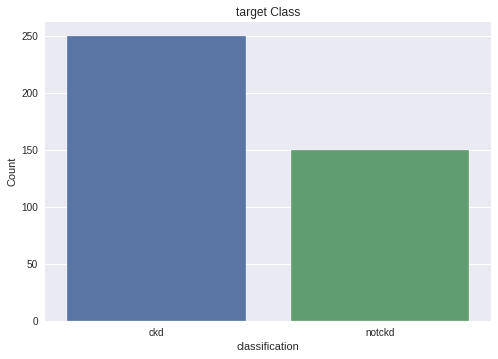

Percent of chronic kidney disease sample:  62.5 %
Percent of not a chronic kidney disease sample:  37.5 %


In [ ]:



















sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']== 'ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']== 'notckd'])/len(df['classification'])*100,2),"%")

In [ ]:

# Store Clean data in csv file
df.to_csv('cleanedckddata.csv', index = False, encoding='utf-8') #mar='\t'

In [ ]:
# if ckd then output is 1 - and if not ckd then output is 0
# if htn then output is 1 - and if not htn then output is 0
# if dm then output is 1 - and if not dm then output is 0
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,classification
0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,yes,yes,ckd
1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.69,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.69,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,yes,no,ckd
4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,no,no,ckd


transfporm data to numeric

In [ ]:
# Converting Categorical 'classification' col to Numeric value
df['classification'] = np.where(df['classification']=='ckd', 1, 0)
df['htn'] = np.where(df['htn']=='yes', 1, 0)
df['dm'] = np.where(df['dm']=='yes', 1, 0) 


In [ ]:
# if ckd then output is 1 - and if not ckd then output is 0
# if htn then output is 1 - and if not htn then output is 0
# if dm then output is 1 - and if not dm then output is 0
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,classification
0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,15.4,44.0,7800.0,5.20,1,1,1
1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,11.3,38.0,6000.0,4.69,0,0,1
2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,9.6,31.0,7500.0,4.69,0,1,1
3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,11.2,32.0,6700.0,3.90,1,0,1
4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,11.6,35.0,7300.0,4.60,0,0,1


In [ ]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,classification
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483300,76.469100,1.017712,1.017300,0.450125,148.036900,57.425925,3.07235,137.529025,4.627850,12.526900,38.864175,8398.571950,4.701725,0.367500,0.335000,0.625000
std,16.974966,13.476298,0.005434,1.272318,1.029487,74.782634,49.285887,5.61749,9.204273,2.819783,2.716171,8.151199,2523.251388,0.840354,0.482728,0.472582,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.40000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,101.000000,27.000000,0.90000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000,0.000000,0.000000,0.000000
50%,54.000000,78.235000,1.020000,1.000000,0.000000,126.000000,44.000000,1.40000,137.530000,4.630000,12.530000,38.770000,8377.630000,4.690000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450000,150.000000,61.750000,3.07000,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000,1.000000,1.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.00000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000


In [ ]:

























df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  wc              400 non-null    float64
 13  rc              400 non-null    float64
 14  htn             400 non-null    int64  
 15  dm              400 non-null    int64  
 16  classification  400 non-null    int64  
dtypes: float64(14), int64(3)
memory usa

In [ ]:
df.shape

(400, 17)

In [ ]:
df.isna().any()

age               False
bp                False
sg                False
al                False
su                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
classification    False
dtype: bool

In [ ]:
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
classification    0
dtype: int64

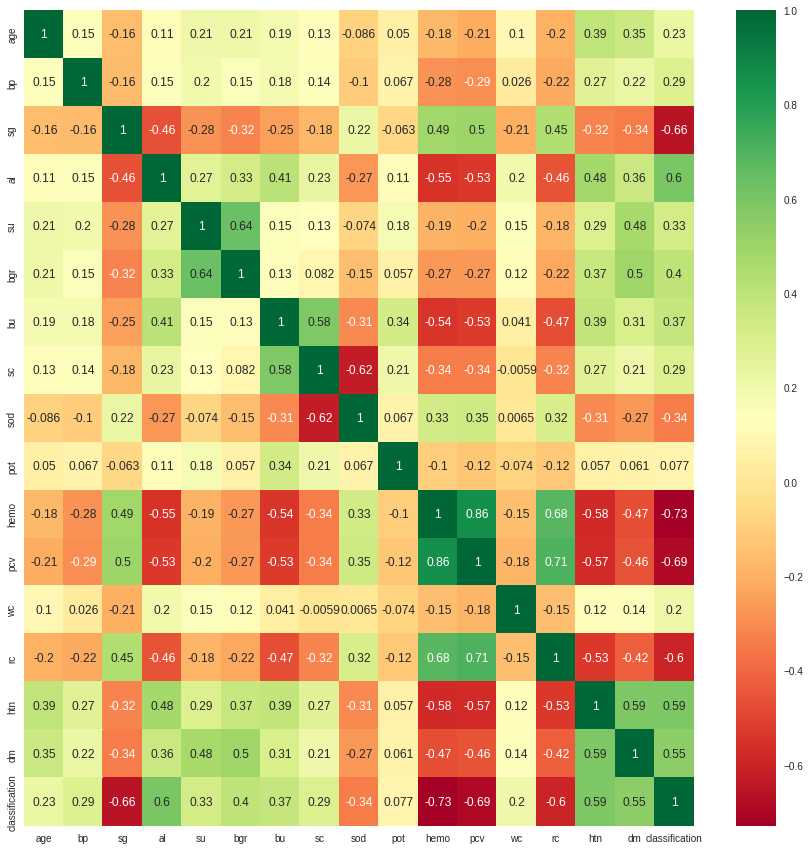

In [ ]:
#get correlations of each features in dataset
import seaborn as sn
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
df_heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

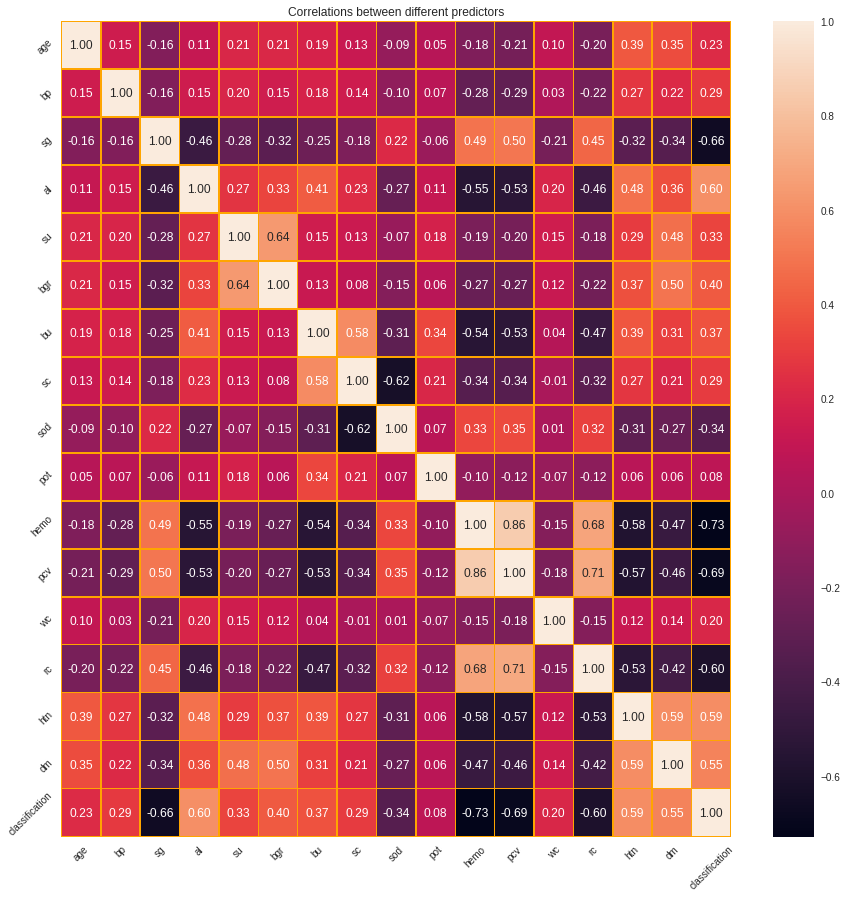

In [ ]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

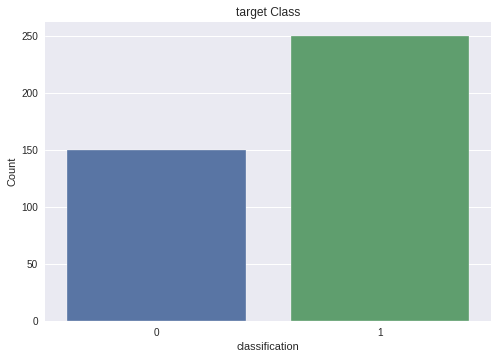

Percent of chronic kidney disease sample:  0.0 %
Percent of not a chronic kidney disease sample:  0.0 %


In [ ]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']== 'ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']== 'notckd'])/len(df['classification'])*100,2),"%")

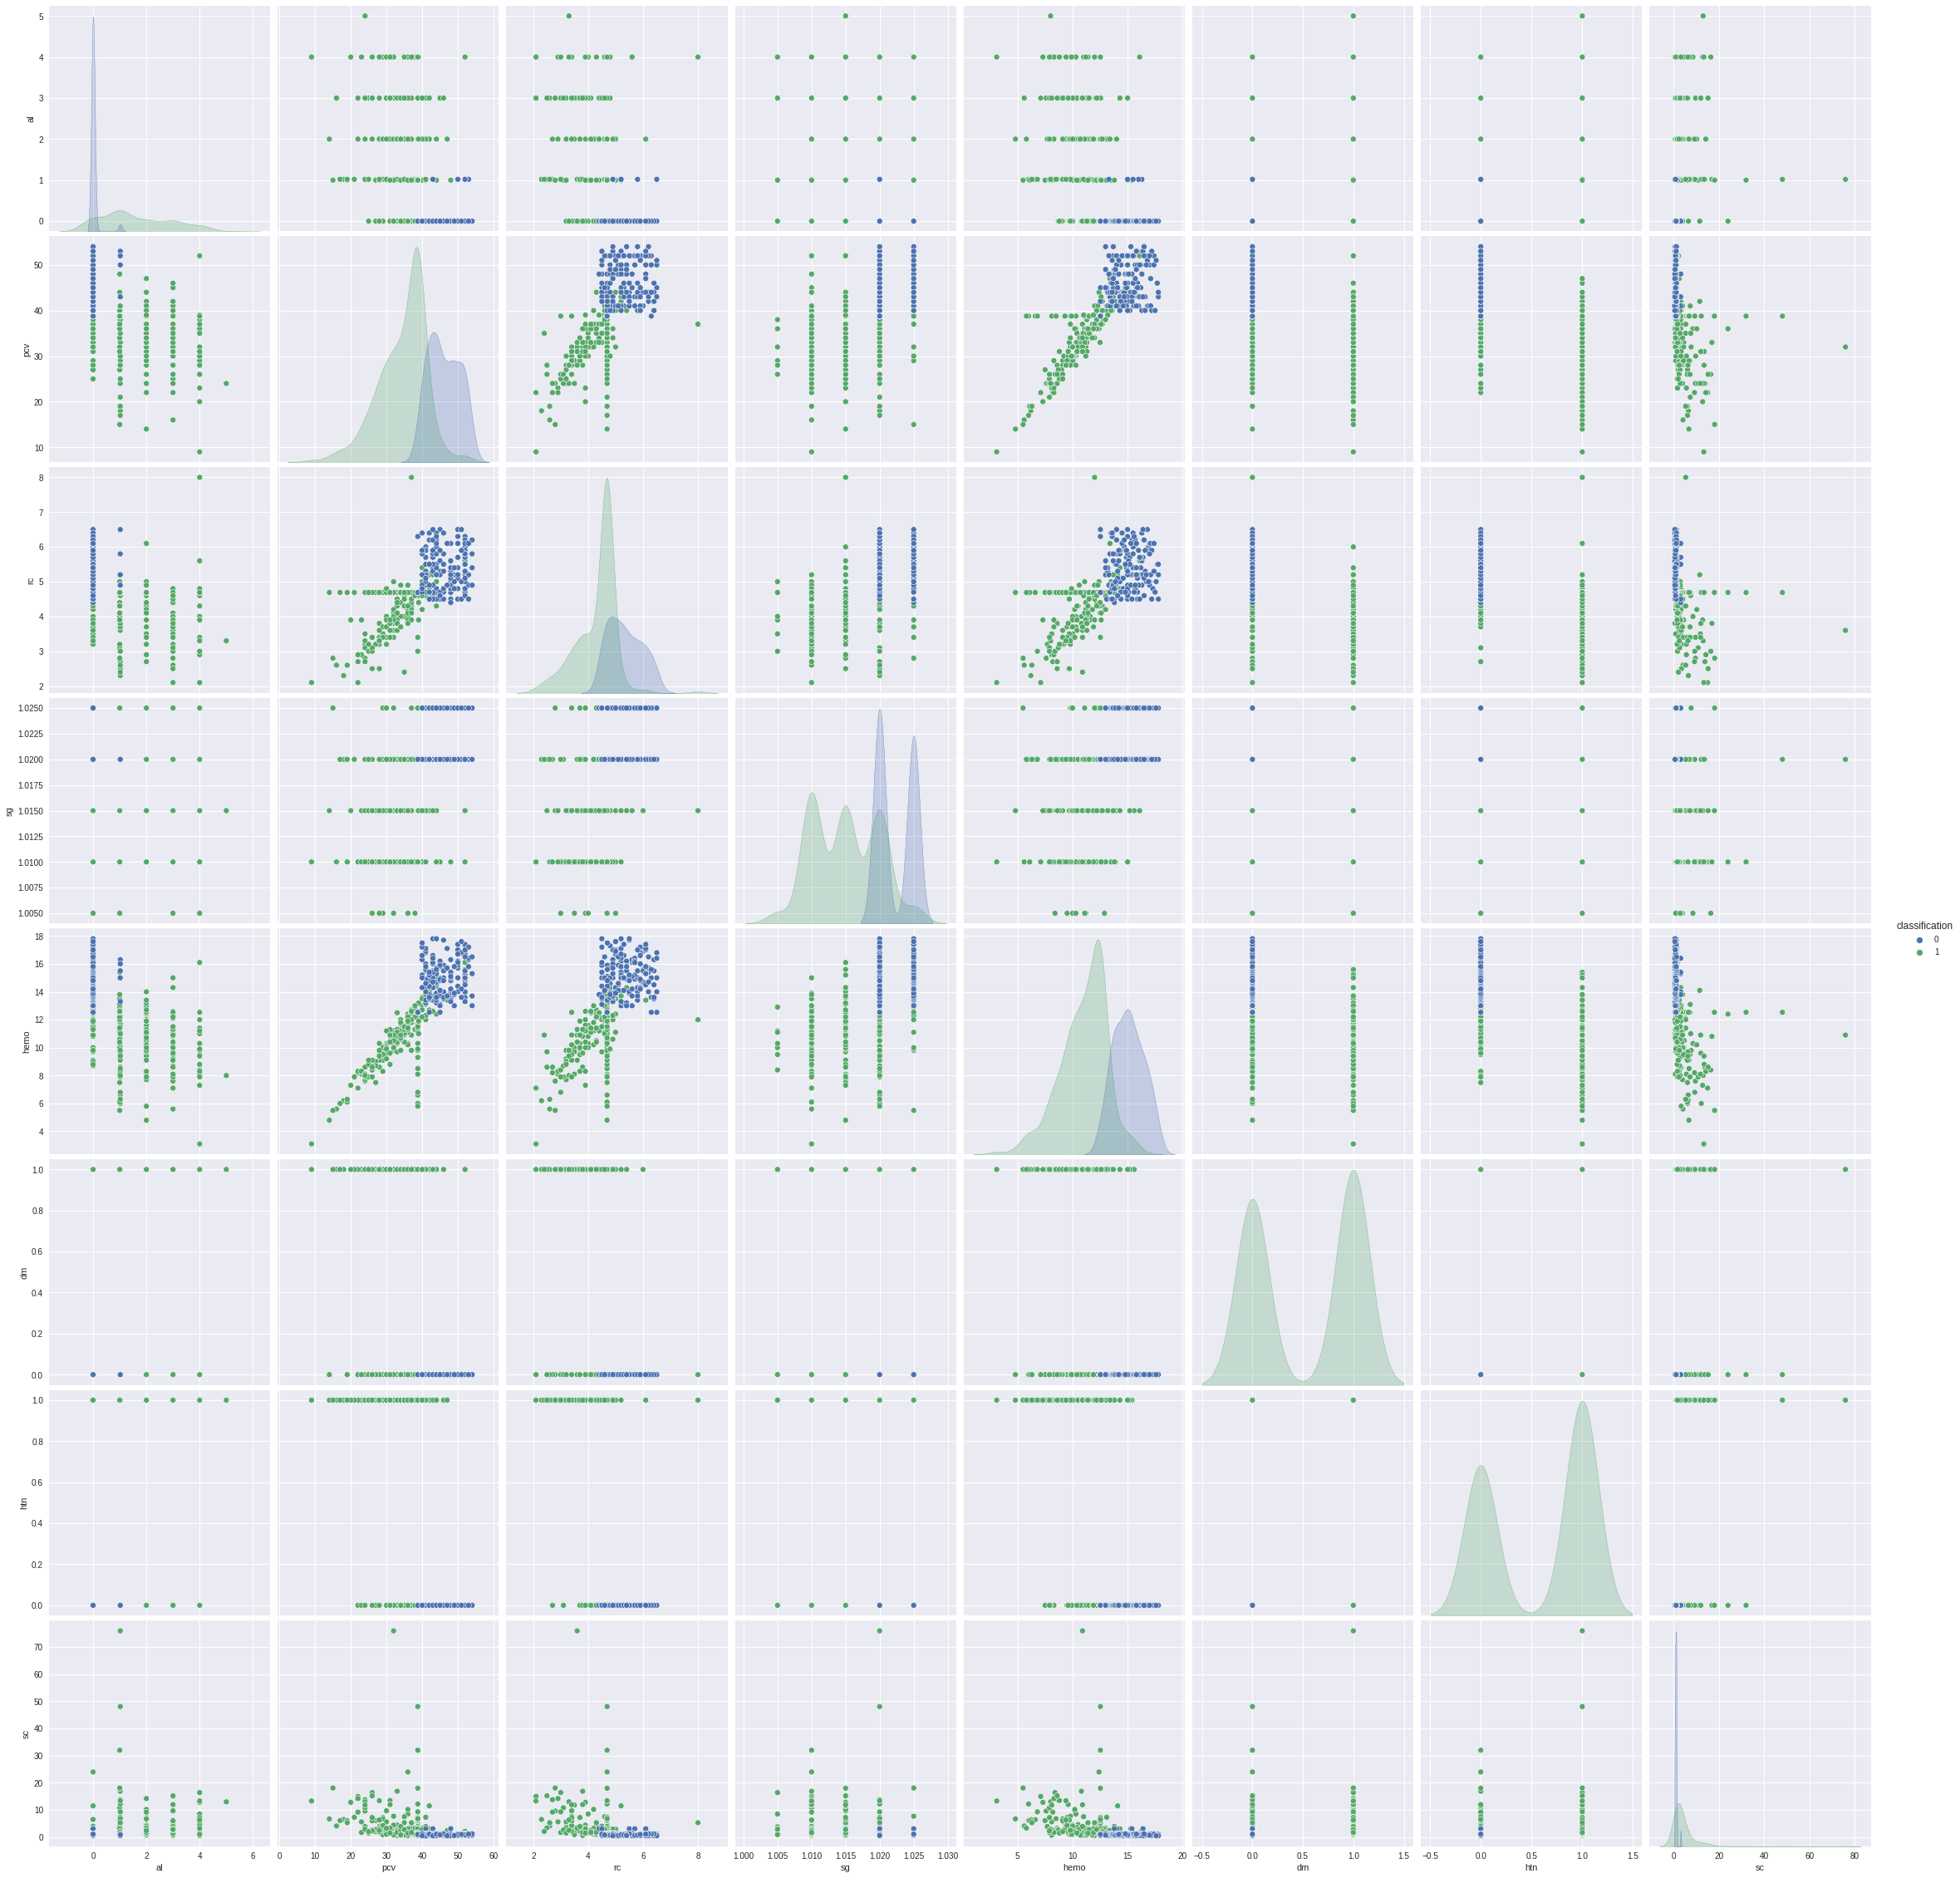

In [ ]:
# Checking data distributions between some highly correlated columns
sns.pairplot(df[['al', 'pcv', 'rc', 'sg', 'hemo', 'dm', 'htn', 'sc', 'classification']], hue='classification', height=4)

In [ ]:
df['classification'].unique()

array([1, 0])

In [ ]:
#create  a list of  the col name to keep based on correlation
columns_to_retain =  ['sg', 'al', 'rc', 'sc', 'su', 'dm', 'hemo', 'pcv', 'htn', 'classification']

columns_to_retain

['sg', 'al', 'rc', 'sc', 'su', 'dm', 'hemo', 'pcv', 'htn', 'classification']

In [ ]:
#now we have to create a new data set  without any other column except the column that we want to retain
#drop the columns that are not in columns to retain
#Drop the columns that are not in columns_2_retain. and create a new dataset
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1)
#drop the rows with na or missing values # or df = df.dropna(inplace=True)
df= df.dropna(axis = 0)
df.head()

,sg,al,su,sc,hemo,pcv,rc,htn,dm,classification
0,1.020,1.0,0.0,1.2,15.4,44.0,5.20,1,1,1
1,1.020,4.0,0.0,0.8,11.3,38.0,4.69,0,0,1
2,1.010,2.0,3.0,1.8,9.6,31.0,4.69,0,1,1
3,1.005,4.0,0.0,3.8,11.2,32.0,3.90,1,0,1
4,1.010,2.0,0.0,1.4,11.6,35.0,4.60,0,0,1


In [ ]:
df.describe()

,sg,al,su,sc,hemo,pcv,rc,htn,dm,classification
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.017712,1.017300,0.450125,3.07235,12.526900,38.864175,4.701725,0.367500,0.335000,0.625000
std,0.005434,1.272318,1.029487,5.61749,2.716171,8.151199,0.840354,0.482728,0.472582,0.484729
min,1.005000,0.000000,0.000000,0.40000,3.100000,9.000000,2.100000,0.000000,0.000000,0.000000
25%,1.015000,0.000000,0.000000,0.90000,10.875000,34.000000,4.500000,0.000000,0.000000,0.000000
50%,1.020000,1.000000,0.000000,1.40000,12.530000,38.770000,4.690000,0.000000,0.000000,1.000000
75%,1.020000,2.000000,0.450000,3.07000,14.625000,44.000000,5.100000,1.000000,1.000000,1.000000
max,1.025000,5.000000,5.000000,76.00000,17.800000,54.000000,8.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88b0aea210>,
      dtype=object)

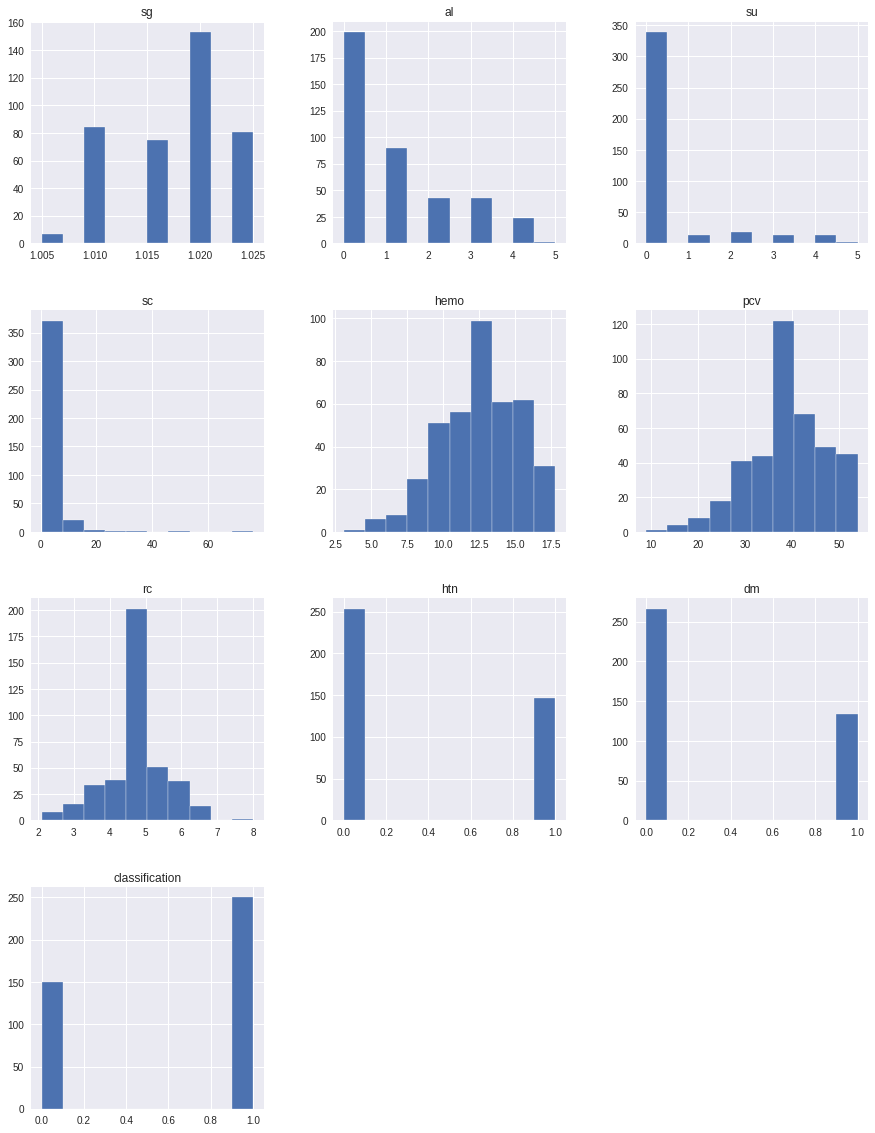

In [ ]:
#data visualisation in histogram 
df.hist(figsize = (15,20))    #to check the distribution of the features 
#Observations:
    #1.hemo looks a bit left skewed
    #2.pcv is left skewed
   # 3.bpis also a bit right skewed
    #4.Rest of the features are lightly skewed

In [ ]:
#split the data into independent (x) data set (the features) and dependent (y) dataset (the target)
X= df.drop(['classification'], axis = 1) #to drop the column  classification
y= df['classification'] #ti contains all target that we want

In [ ]:
#feature scaling  #Scaling data to standard deviation range to reduce computing and increase model performence
#min-max scaler method sclaes the dataset so that all the input feautres lie between 0 and 1
#x_scaler = MinMaxScaler()
#x_scaler.fit(X)
#column_names = X.columns
#X[column_names] = x_scaler.transform(X)
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
X.shape

(400, 9)

In [ ]:
#Split the data into 80% training and 20% testing and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [ ]:
# defining dependent y
y = df.iloc[:, -1]
y.head(3)

0    1
1    1
2    1
Name: classification, dtype: int64

In [ ]:
#print the shape of the new x objects
print (X_train.shape)
print (X_test.shape)

(320, 9)
(80, 9)


In [ ]:
#print the shape of the new y objects 287 total patients after dropping nan . 229 for tain 58 patients for testing
print (y_train.shape)
print (y_test.shape)

(320,)
(80,)


In [ ]:
#build the model multi linear perceptron #256 neurons, len(X.columns)  is number of features in our dataset
mlp= Sequential()
mlp.add( Dense (256, input_dim = len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation= 'relu') )
mlp.add( Dense(1, activation='hard_sigmoid') )

In [ ]:
#compile the model #crossentropy: fn used for binary classess or 2 classses yto classsify if a person has ckd or not
#loss fn measures how well the model does the training
#optimizer =adam
mlp.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#train the model
#epochs is the number of genration over the entire data set to train on
#batch size is the number of several graidient for training
history = mlp.fit(X_train, y_train, epochs = (2000), batch_size = X_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 3s 3s/step - loss: 0.6857 - accuracy: 0.6187
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.6774 - accuracy: 0.6187
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6691 - accuracy: 0.6187
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6610 - accuracy: 0.6187
Epoch 5/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6531 - accuracy: 0.6187
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6452 - accuracy: 0.6187
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6374 - accuracy: 0.6469
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6297 - accuracy: 0.7375
Epoch 9/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6221 - accuracy: 0.8656
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6145 - accuracy: 0.9250
Epoch 11/2000
1/1

In [ ]:
#save the model
mlp.save('ckd.model')

INFO:tensorflow:Assets written to: ckd.model/assets


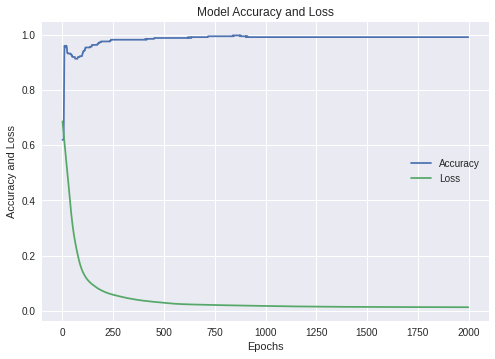

In [ ]:
#visualise the model loss and accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'],label= 'Loss')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
#to check if the patient has ckd or not
#get the shape of the training and the testing data
#training data 229 pateints rows and 6 colums datapoints
#test data 58 pateints row and 6 colums datapoints

print('shape of the training data:', X_train.shape)
print('shape of the test data', X_test.shape)

shape of the training data: (320, 9)
shape of the test data (80, 9)


In [ ]:
#to see how the model preidcts and diagnos patients
mlp_pred= mlp.predict(X_test)
mlp_pred= [1 if y>=0.5 else 0 for y in mlp_pred] #when using ANN , we can get probability and make 1 if y>=0.5 else 0. 0.5 is the threshold
mlp_pred

[1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1]

In [ ]:
#show the actual values. if the patient actually has ckd or not
y_test

130    1
139    1
318    0
297    0
148    1
      ..
90     1
168    1
333    0
355    0
236    1
Name: classification, Length: 80, dtype: int64

In [ ]:
y.value_counts()

1    250
0    150
Name: classification, dtype: int64

In [ ]:
#among 400 cases in the dataset 248 cases are ckd, and 152 cases are not ckd

y.dtypes

dtype('int64')

In [ ]:
# converting y to numpy 1D array
y = y.values

In [ ]:
#show the actual and predicted values side by side
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in mlp_pred)))

Original: 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1
Predicted: 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1


In [ ]:
#from sklearn.metrics import accuracy_score
#mlp_acc = round(accuracy_score(y_test, mlp_pred)*100, 2)
#print(f'Multi Layer Perceptron Model Accuracy: {mlp_acc}%')

Multi Layer Perceptron Model Accuracy: 98.75%


In [ ]:
mlp_conf_matrix = confusion_matrix(y_test, mlp_pred)
mlp_conf_matrix

array([[27,  1],
       [ 0, 52]])

Text(51.0, 0.5, 'Truth')

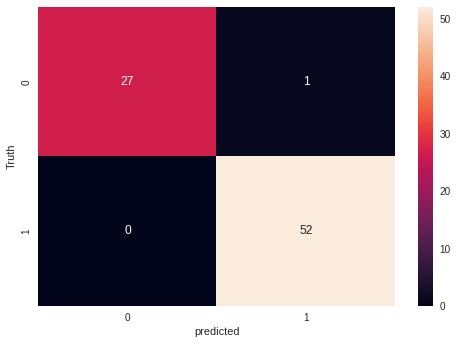

In [ ]:
sns.heatmap(mlp_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, mlp_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 27
False Pos: 1
False Neg: 0
True Pos: 52


In [ ]:
mlp_classification_report = classification_report(y_test, mlp_pred)
print(mlp_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
#type(y)

In [ ]:
#y

In [ ]:
#print the shape of the new x objects
print (X_train.shape)
print (X_test.shape)

(320, 9)
(80, 9)


In [ ]:
#print the shape of the new y objects 287 total patients after dropping nan . 248 for tain 63 patients for testing
print (y_train.shape)
print (y_test.shape)

(320,)
(80,)


In [ ]:
#knn
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
knn_pred = knn.predict(X_test)
knn_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
#show the actual and predicted values side by side
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in knn_pred)))

Original: 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1
Predicted: 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1


In [ ]:
# Checking Model prediction accuracy
knn_acc = round(accuracy_score(y_test, knn_pred)*100, 2)
print(f'KNN Accuracy {knn_acc}%')

KNN Accuracy 97.5%


In [ ]:
#Tuning KNN Model Accurecy using 10-fold cross validation, n_neighbors

from sklearn.model_selection import cross_val_score

accuracy = []
for n in range(1, 20):
	knn = KNeighborsClassifier(n_neighbors=n)
	acc = cross_val_score(knn, X, y, cv=11)
	accuracy.append(round(acc.mean()*100, 2))
accuracy

[99.0,
 98.49,
 97.99,
 97.73,
 97.49,
 97.73,
 97.74,
 97.74,
 98.24,
 97.99,
 98.25,
 97.99,
 98.24,
 97.99,
 98.24,
 97.73,
 97.99,
 97.99,
 97.99]

In [ ]:
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_conf_matrix

array([[28,  0],
       [ 2, 50]])

Text(51.0, 0.5, 'Truth')

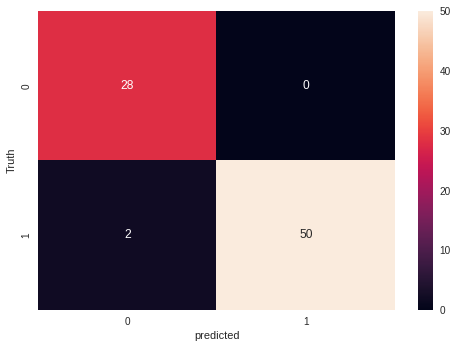

In [ ]:
sns.heatmap(knn_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 28
False Pos: 0
False Neg: 2
True Pos: 50


In [ ]:
knn_classification_report = classification_report(y_test, knn_pred)
print(knn_classification_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [ ]:
# Choosing a K Value.
# Let's go ahead and use the elbow method to pick a good k value.
from sklearn.model_selection import cross_val_score
error_rate = []

# Will take some time
#for i in range(1,40):
    
   # knn = KNeighborsClassifier(n_neighbors=i)
   # knn.fit(X_train,y_train)
    #pred_i = knn.predict(X_test)
   #error_rate.append(np.mean(pred_i != y_test))

In [ ]:
#plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red',markersize=10)
#plt.title('Error Rate vs. K Value')
#plt.xlabel('K')
#plt.ylabel('Error Rate')

In [ ]:
#Random Forest Classifier
rndf = RandomForestClassifier(max_depth=20, n_estimators=21)
rndf.fit(X_train, y_train)
RandomForestClassifier(max_depth=20, n_estimators=21)
rndf_pred = rndf.predict(X_test)
rndf_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
# Checking Model prediction accurecy
rndf_acc = round(accuracy_score(y_test, rndf_pred)*100, 2)
print(f'Random Forest Accurecy: {rndf_acc}%')

Random Forest Accurecy: 98.75%


In [ ]:
#Tuning Model Accurecy using Cross Validation and n_estimators
from sklearn.model_selection import cross_val_score

rndf_accuracy = []
for n in range(10, 30):
	rndf = RandomForestClassifier(n_estimators=n)
	acc = cross_val_score(rndf, X, y, cv=10)
	rndf_accuracy.append(round(acc.mean()*100, 2))
rndf_accuracy

[99.25,
 99.5,
 99.25,
 98.75,
 98.75,
 99.0,
 99.5,
 99.25,
 99.5,
 99.0,
 99.25,
 98.75,
 99.25,
 99.0,
 99.0,
 99.25,
 99.25,
 99.25,
 99.75,
 99.5]

In [ ]:
rndf_conf_matrix = confusion_matrix(y_test, rndf_pred)
rndf_conf_matrix

array([[28,  0],
       [ 1, 51]])

Text(51.0, 0.5, 'Truth')

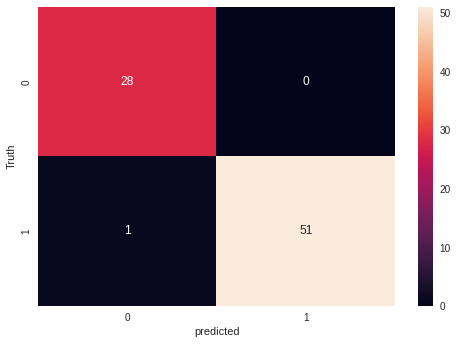

In [ ]:
sns.heatmap(rndf_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rndf_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 28
False Pos: 0
False Neg: 1
True Pos: 51


In [ ]:
rndf_classification_report = classification_report(y_test, rndf_pred)
print(rndf_classification_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
#SVM -> SVC Model [Support Vector Classifier]
# from sklearn.svm import SVC
svc = SVC(C=1.5)
svc.fit(X_train, y_train)

SVC(C=1.5)

In [ ]:
svc_pred = svc.predict(X_test)
svc_acc = round(accuracy_score(y_test, svc_pred)*100, 2)
print(f'SVM Accurecy: {svc_acc}%')

SVM Accurecy: 100.0%


In [ ]:
from sklearn import svm
clf= svm.SVC(kernel='linear', C=1).fit(X_train,y_train)
clf.score(X_test, y_test)  #Test

0.975

In [ ]:
clf.score(X_train, y_train) #cross validation 

0.984375

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
svc_conf_matrix = confusion_matrix(y_test, svc_pred)
svc_conf_matrix

array([[28,  0],
       [ 0, 52]])

Text(51.0, 0.5, 'Truth')

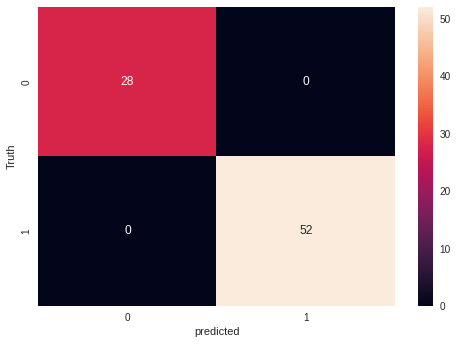

In [ ]:
sns.heatmap(svc_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, svc_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 28
False Pos: 0
False Neg: 0
True Pos: 52


In [ ]:
svc_classification_report = classification_report(y_test, svc_pred)
print(svc_classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
gnb_pred = gnb.predict(X_test)
gnb_pred

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in gnb_pred)))

Original: 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1
Predicted: 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1


In [ ]:
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, 2)
print(f'GNB Model Accuracy: {gnb_acc}%')

GNB Model Accuracy: 95.0%


In [ ]:
gnb_conf_matrix = confusion_matrix(y_test, gnb_pred)
gnb_conf_matrix

array([[28,  0],
       [ 4, 48]])

Text(51.0, 0.5, 'Truth')

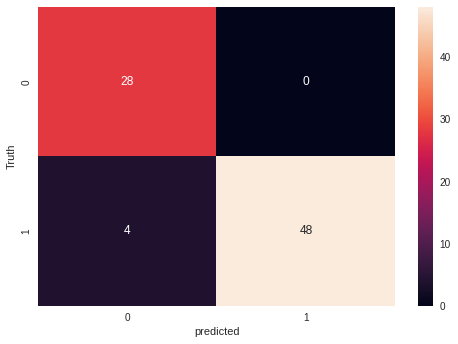

In [ ]:
sns.heatmap(gnb_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, gnb_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 28
False Pos: 0
False Neg: 4
True Pos: 48


In [ ]:
gnb_classification_report = classification_report(y_test, gnb_pred)
print(gnb_classification_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.92      0.96        52

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [ ]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
dtc_pred = dtc.predict(X_test)
dtc_acc = round(accuracy_score(y_test, dtc_pred)*100, 2)
print(f'Decision Tree Classifier Accuracy: {dtc_acc}%')

Decision Tree Classifier Accurecy: 95.0%


In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in dtc_pred)))

Original: 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1
Predicted: 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1


In [ ]:
dtc_conf_matrix = confusion_matrix(y_test, dtc_pred)
dtc_conf_matrix

array([[28,  0],
       [ 4, 48]])

Text(51.0, 0.5, 'Truth')

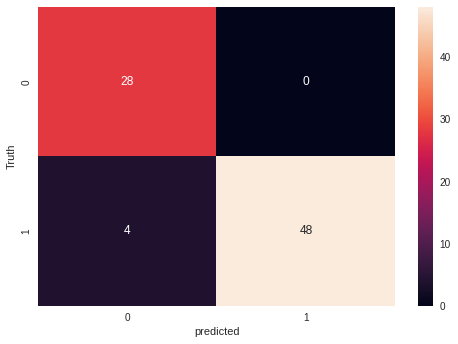

In [ ]:
sns.heatmap(dtc_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, dtc_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 28
False Pos: 0
False Neg: 4
True Pos: 48


In [ ]:
dtc_classification_report = classification_report(y_test, dtc_pred)
print(dtc_classification_report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.92      0.96        52

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [ ]:
#logistics regression train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#make prediction the testing set
logreg_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_test, logreg_pred)*100, 2)
print(f'Logistic Regression: {logreg_acc}%')

Logistic Regression: 97.5%


In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in logreg_pred)))

Original: 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1
Predicted: 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1


In [ ]:
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_conf_matrix

array([[28,  0],
       [ 2, 50]])

Text(51.0, 0.5, 'Truth')

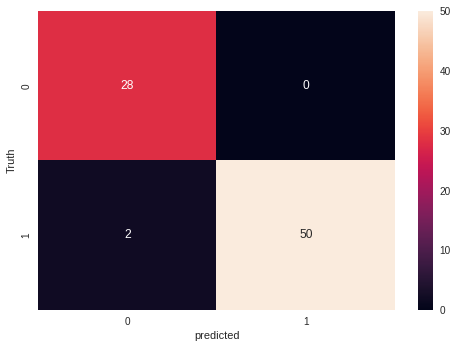

In [ ]:
sns.heatmap(logreg_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
logreg_classification_report = classification_report(y_test, logreg_pred)
print(logreg_classification_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, logreg_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

True Neg: 28
False Pos: 0
False Neg: 2
True Pos: 50


In [ ]:
#model comparison 
#models = pd.DataFrame({
   # 'Model' : [ 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN', 'GNB', 'MLP', 'SVM', 'Logistics Regression' ],
   # 'Score' : [ dtc_acc, rndf_acc, knn_acc, gnb_acc, mlp_acc, svc_acc, logreg_acc ]
#})


#models.sort_values(by = 'Score', ascending = False)

,Model,Score
5,SVM,100.00
1,Random Forest Classifier,98.75
4,MLP,98.75
2,KNN,97.50
6,Logistics Regression,97.50
0,Decision Tree Classifier,95.00
3,GNB,95.00


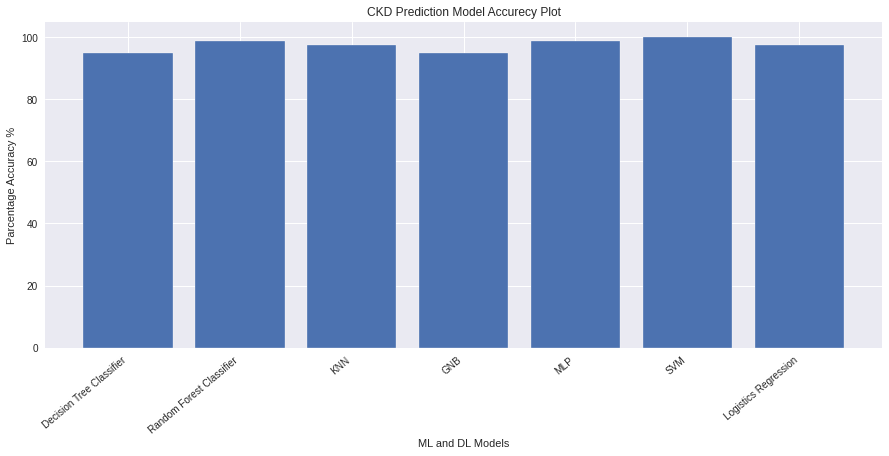

In [ ]:
plt.figure(figsize=(15, 6))
models = ['Decision Tree Classifier', 'Random Forest Classifier', 'KNN', 'GNB', 'MLP', 'SVM', 'Logistics Regression' ]
models_acc = [dtc_acc, rndf_acc, knn_acc, gnb_acc, mlp_acc, svc_acc, logreg_acc ]
# xax = [1, 2, 3, 4, 5]

plt.title('CKD Prediction Model Accurecy Plot')
plt.bar(models, models_acc, label=models)
plt.xticks(models, rotation=40, ha='right')
plt.ylabel('Parcentage Accuracy %')
plt.xlabel('ML and DL Models')
# plt.legend()

# plt.savefig('figName.png', dpi=300)
plt.show()

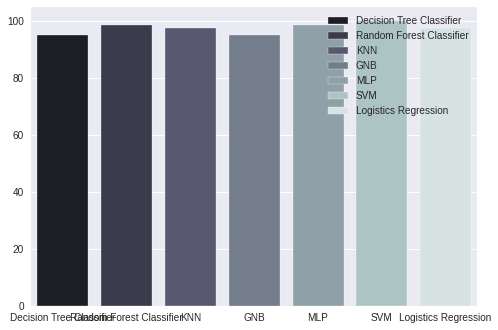

In [ ]:
sns.barplot(models, models_acc, palette="bone", hue=models, dodge=False)

In [ ]:
#roc curve

In [ ]:
#Generate sythetic data

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [ ]:
#Add noisy features to make the problem more difficult  

In [ ]:
import numpy as np

In [ ]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [ ]:
#Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [ ]:
#Build classification model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier #for MLP

In [ ]:

#Random forest
rndf = RandomForestClassifier(max_features=5, n_estimators=500)
rndf.fit(X_train, Y_train)

RandomForestClassifier(max_features=5, n_estimators=500)

In [ ]:
#nb
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
#svc
svc = SVC(C=1.5)
svc.fit(X_train, Y_train)


SVC(C=1.5)

In [ ]:
#DTC
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#logreg
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
#ANN
import keras as k
mlp = MLPClassifier(hidden_layer_sizes = (10, 10, 10), max_iter=1000)
mlp.fit(X_train, Y_train.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [ ]:
#Model evaluation 

In [ ]:
# for svmplot_roc(Y_test,probs_svm)

In [ ]:
#Prediction probabilities

In [ ]:
r_probs = [0 for _ in range(len(Y_test))]
rndf_probs = rndf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
dtc_probs = dtc.predict_proba(X_test)
logreg_probs = logreg.predict_proba(X_test)
mlp_probs = mlp.predict_proba(X_test)

In [ ]:
#Probabilities for the positive outcome is kept.

In [ ]:
rndf_probs = rndf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
logreg_probs = logreg_probs[:, 1]
mlp_probs = mlp_probs[:, 1]

In [ ]:

#Computing AUROC and ROC curve values

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
r_auc = roc_auc_score(Y_test, r_probs)
rndf_auc = roc_auc_score(Y_test, rndf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)
knn_auc = roc_auc_score(Y_test, knn_probs)
dtc_auc = roc_auc_score(Y_test, dtc_probs)
logreg_auc = roc_auc_score(Y_test, logreg_probs)
mlp_auc = roc_auc_score(Y_test, mlp_probs)

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rndf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K Nearest Neighbors: AUROC = %.3f' % (knn_auc))
print('Decision Tree: AUROC = %.3f' % (dtc_auc))
print('Logistic Regression: AUROC = %.3f' % (logreg_auc))
print('Multi Layer Perceptron: AUROC = %.3f' % (mlp_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.874
Naive Bayes: AUROC = 0.993
K Nearest Neighbors: AUROC = 0.580
Decision Tree: AUROC = 0.969
Logistic Regression: AUROC = 0.947
Multi Layer Perceptron: AUROC = 0.594


In [ ]:
#Calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rndf_fpr, rndf_tpr, _ = roc_curve(Y_test, rndf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(Y_test, dtc_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(Y_test, logreg_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(Y_test, mlp_probs)

In [ ]:
nb_fpr, nb_tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00483092, 0.00483092, 0.00483092, 0.00483092,
        0.0531401 , 0.0531401 , 0.06280193, 0.06280193, 0.08695652,
        0.08695652, 0.12560386, 0.12560386, 0.2705314 , 0.2705314 ,
        1.        ]),
 array([0.        , 0.14507772, 0.17098446, 0.1761658 , 0.20725389,
        0.21761658, 0.21761658, 0.22279793, 0.23316062, 0.97409326,
        0.97409326, 0.97927461, 0.97927461, 0.98445596, 0.98445596,
        0.98963731, 0.98963731, 0.99481865, 0.99481865, 1.        ,
        1.        ]))

In [ ]:
logreg_fpr, logreg_tpr

(array([0.        , 0.        , 0.        , 0.00483092, 0.00483092,
        0.00966184, 0.00966184, 0.01932367, 0.01932367, 0.02415459,
        0.02415459, 0.02898551, 0.02898551, 0.03381643, 0.03381643,
        0.03864734, 0.03864734, 0.04347826, 0.04347826, 0.0531401 ,
        0.0531401 , 0.05797101, 0.05797101, 0.06280193, 0.06280193,
        0.06763285, 0.06763285, 0.07246377, 0.07246377, 0.13043478,
        0.13043478, 0.1352657 , 0.1352657 , 0.14492754, 0.14492754,
        0.15942029, 0.15942029, 0.17391304, 0.17391304, 0.17874396,
        0.17874396, 0.1884058 , 0.1884058 , 0.19323671, 0.19323671,
        0.26570048, 0.26570048, 0.2705314 , 0.2705314 , 0.28502415,
        0.28502415, 0.29468599, 0.29468599, 0.30434783, 0.30434783,
        0.31884058, 0.31884058, 0.33816425, 0.33816425, 0.36714976,
        0.36714976, 0.38647343, 0.38647343, 0.41545894, 0.41545894,
        0.51207729, 0.51207729, 0.65217391, 0.65217391, 0.78743961,
        0.78743961, 1.        ]),
 array([0.    

In [ ]:
knn_fpr, knn_tpr

(array([0.        , 0.04347826, 0.16908213, 0.50241546, 0.79710145,
        0.97101449, 1.        ]),
 array([0.        , 0.06217617, 0.2642487 , 0.61658031, 0.88082902,
        0.97927461, 1.        ]))

In [ ]:
dtc_fpr, dtc_tpr

(array([0.        , 0.01449275, 1.        ]),
 array([0.        , 0.95336788, 1.        ]))

In [ ]:
nb_fpr, nb_tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00483092, 0.00483092, 0.00483092, 0.00483092,
        0.0531401 , 0.0531401 , 0.06280193, 0.06280193, 0.08695652,
        0.08695652, 0.12560386, 0.12560386, 0.2705314 , 0.2705314 ,
        1.        ]),
 array([0.        , 0.14507772, 0.17098446, 0.1761658 , 0.20725389,
        0.21761658, 0.21761658, 0.22279793, 0.23316062, 0.97409326,
        0.97409326, 0.97927461, 0.97927461, 0.98445596, 0.98445596,
        0.98963731, 0.98963731, 0.99481865, 0.99481865, 1.        ,
        1.        ]))

In [ ]:
mlp_fpr, mlp_tpr

(array([0.        , 0.        , 0.        , 0.01449275, 0.01449275,
        0.01932367, 0.01932367, 0.02415459, 0.02415459, 0.03381643,
        0.03381643, 0.03864734, 0.03864734, 0.04347826, 0.04347826,
        0.0531401 , 0.0531401 , 0.06763285, 0.06763285, 0.07729469,
        0.07729469, 0.0821256 , 0.0821256 , 0.10144928, 0.10144928,
        0.10628019, 0.10628019, 0.11111111, 0.11111111, 0.11594203,
        0.11594203, 0.12560386, 0.12560386, 0.1352657 , 0.1352657 ,
        0.14009662, 0.14009662, 0.14492754, 0.14492754, 0.14975845,
        0.14975845, 0.15458937, 0.15458937, 0.16425121, 0.16425121,
        0.19806763, 0.19806763, 0.20289855, 0.20289855, 0.20772947,
        0.20772947, 0.22705314, 0.22705314, 0.23188406, 0.23188406,
        0.23671498, 0.23671498, 0.24637681, 0.24637681, 0.25603865,
        0.25603865, 0.26086957, 0.26086957, 0.2705314 , 0.2705314 ,
        0.27536232, 0.27536232, 0.28019324, 0.28019324, 0.28502415,
        0.28502415, 0.28985507, 0.28985507, 0.29

In [ ]:
#Plot the ROC curve

In [ ]:
import matplotlib.pyplot as plt

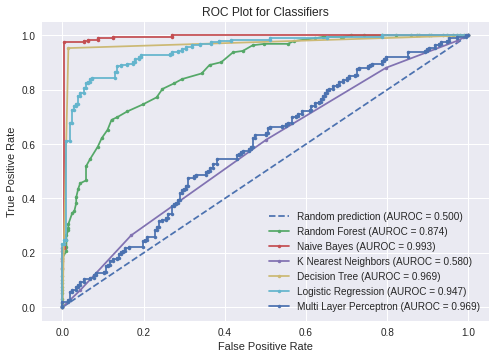

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rndf_fpr, rndf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rndf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dtc_auc)
plt.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logreg_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='Multi Layer Perceptron (AUROC = %0.3f)' % dtc_auc)
# Title
plt.title('ROC Plot for Classifiers')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
#plt.show()     #nb has the highest provided the best erfromacne of about aucov alomost 1

In [ ]:
rndf_auc

0.8739580986708718

In [ ]:
nb_auc

0.9932417211083577

In [ ]:
logreg_auc

0.9470100873570123

In [ ]:
knn_auc

0.5797226602588171

In [ ]:
dtc_auc

0.96943756101224

In [ ]:
rndf_auc

0.8739580986708718

In [ ]:
r_auc

0.5

In [ ]:
print('nb: %.2f' % nb_auc)

nb: 0.99


In [ ]:
#Save ROC plot
from IPython.display import Image, display
#Save plot to files
plt.savefig('CKDroc.pdf')

<Figure size 576x396 with 0 Axes>

In [ ]:
plt.savefig('roc.png')

<Figure size 576x396 with 0 Axes>

In [ ]:
! ls -l

total 96
drwxr-xr-x 4 root root  4096 Apr  4 07:13 ckd.model
-rw-r--r-- 1 root root  1191 Apr  4 07:14 CKDroc.pdf
-rw-r--r-- 1 root root 33297 Apr  4 07:11 cleanedckddata.csv
-rw-r--r-- 1 root root 42107 Apr  4 07:11 kidney_disease.csv
-rw-r--r-- 1 root root  1924 Apr  4 07:14 roc.png
drwxr-xr-x 1 root root  4096 Mar 23 14:22 sample_data


In [ ]:

#View the generated PNG and PDF files

In [ ]:

print('nb: %.4f' % nb_auc)

nb: 0.9932


In [ ]:
#svm evaluation
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [ ]:
#roc curve svm
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train, Y_train)
pred_svm=svm.predict(X_test)
probs_svm=svm.decision_function(X_test)

In [ ]:
def plot_roc(Y_test, probs):
  fpr,tpr,threshold=roc_curve(Y_test,probs)
  fpr,tpr,threshold=roc_curve(Y_test,probs)
  roc_auc=auc(fpr,tpr)
  print('ROC AUC=0.2f'%roc_auc)
  plt.plot(fpr,tpr,label='AUC=%0.3f'%roc_auc,color='darkorange')
  plt.legend(loc='lower right')
  plt.plot([0,1],[0,1],'b--')
  plt.xlim([0,1])
  plt.ylim([0,1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

ROC AUC=0.2f


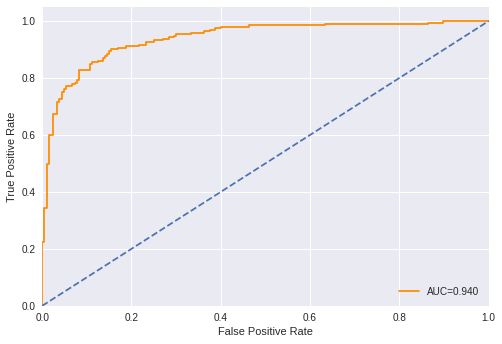

In [ ]:
plot_roc(Y_test,probs_svm)

In [ ]:
X.shape

(2000, 2010)

In [ ]:
Y_test

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,

In [ ]:
#print the shape of the new x objects
print (X_train.shape)
print (X_test.shape)

(1600, 2010)
(400, 2010)


In [ ]:
#END

In [ ]:
#build the model multi linear perceptron #256 neurons, len(X.columns)  is number of features in our dataset
mlp= Sequential()
mlp.add( Dense (256, input_dim = len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation= 'relu') )
mlp.add( Dense(1, activation='hard_sigmoid') )

AttributeError: ignored

In [ ]:
#compile the model #crossentropy: fn used for binary classess or 2 classses yto classsify if a person has ckd or not
#loss fn measures how well the model does the training
#optimizer =adam
mlp.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#train the model
#epochs is the number of genration over the entire data set to train on
#batch size is the number of several graidient for training
history = mlp.fit(X_train, y_train, epochs = (1000), batch_size = X_train.shape[0]) 

In [ ]:
#save the model
mlp.save('ckd.model')

In [ ]:
#visualise the model loss and accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'],label= 'Loss')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
#to check if the patient has ckd or not
#get the shape of the training and the testing data
#training data 229 pateints rows and 6 colums datapoints
#test data 58 pateints row and 6 colums datapoints

print('shape of the training data:', X_train.shape)
print('shape of the test data', X_test.shape)

In [ ]:
#to see how the model preidcts and diagnos patients
mlp_pred= mlp.predict(X_test)
mlp_pred= [1 if y>=0.5 else 0 for y in mlp_pred] #when using ANN , we can get probability and make 1 if y>=0.5 else 0. 0.5 is the threshold
mlp_pred

In [ ]:
#show the actual values. if the patient actually has ckd or not
y_test

In [ ]:
#show the actual and predicted values side by side
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in mlp_pred)))

In [ ]:
from sklearn.metrics import accuracy_score
mlp_acc = round(accuracy_score(y_test, mlp_pred)*100, 2)
print(f'Multi Layer Perceptron Model Accuracy: {mlp_acc}%')

In [ ]:
# from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_theme(style="whitegrid")
style.use('seaborn')

In [ ]:
model_conf_matrix = confusion_matrix(y_test, mlp_pred)
model_conf_matrix

In [ ]:
sns.heatmap(model_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, mlp_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

In [ ]:
# Multi Layer Perceptron Artificial Neural Network
from sklearn.neural_network import MLPClassifier 
# Setting up a primitive (non-validated) model
mlp = MLPClassifier(random_state = 0)# ANN model object created

mlp.fit(X_train, y_train) # ANN model object fit

In [ ]:
# Forecasting on the Unvalidated Model
y_pred = mlp.predict(X_test) # model prediction process over test set

In [ ]:
import sklearn.metrics as metrics

# Accuracy

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

# f1 score

print("f1_weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))

In [ ]:
from sklearn.metrics import classification_report
mlp_classification_report = classification_report(y_test, mlp_pred)
print(mlp_classification_report)


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.iloc[:,:-1]
y = df['classification']

logreg = LogisticRegression(max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)
logreg.fit(X_train,y_train)

In [ ]:
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

In [ ]:
#make prediction the testing set
logreg_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_test, logreg_pred)*100, 2)
print(f'Logistic Regression: {logreg_acc}%')

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in logreg_pred)))

In [ ]:
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_conf_matrix

In [ ]:
sns.heatmap(logreg_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
logreg_classification_report = classification_report(y_test, logreg_pred)
print(logreg_classification_report)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

In [ ]:
print(classification_report(y_test,test_pred))

In [ ]:
#random forest
rf = RandomForestClassifier(max_depth=20, n_estimators=21)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf_pred = rf.predict(X_test)
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

In [ ]:
rf_pred

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in rf_pred)))

In [ ]:
 #Checking Model prediction accuracy
rf_acc = round(accuracy_score(y_test, rf_pred)*100, 2)
print(f'Random Forest Accuracy: {rf_acc}%')

In [ ]:
#Tuning Model Accurecy using Cross Validation and n_estimators
from sklearn.model_selection import cross_val_score

rf_accuracy = []
for n in range(10, 30):
	rf = RandomForestClassifier(n_estimators=n)
	acc = cross_val_score(rf, X, y, cv=10)
	rf_accuracy.append(round(acc.mean()*100, 2))

In [ ]:
rf_accuracy

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_conf_matrix

In [ ]:
sns.heatmap(rf_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
rf_classification_report = classification_report(y_test, rf_pred)
print(rf_classification_report)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

In [ ]:
# SVM -> SVC Model [Support Vector Classifier]

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=1)
svc.fit(X_train, y_train)

In [ ]:
from sklearn import svm
clf= svm.SVC(kernel='linear', C=1).fit(X_train,y_train)
clf.score(X_test, y_test)  #Test

In [ ]:
clf.score(X_train, y_train) #cross validation

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
svc_acc = round(accuracy_score(y_test, svc_pred)*100, 2)
print(f'SVM Accuracy: {svc_acc}%')

In [ ]:

svc_conf_matrix = confusion_matrix(y_test, svc_pred)
svc_conf_matrix

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in svc_pred)))

In [ ]:
sns.heatmap(svc_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, svc_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

In [ ]:
svc_classification_report = classification_report(y_test, svc_pred)
print(svc_classification_report)

In [ ]:
 # Decision tree

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

In [ ]:
dtc_pred = dtc.predict(X_test)

In [ ]:
dtc_acc = round(accuracy_score(y_test, dtc_pred)*100, 2)
print(f'Decision Tree Classifier Accuracy: {dtc_acc}%')

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in dtc_pred)))

In [ ]:
dtc_conf_matrix = confusion_matrix(y_test, dtc_pred)
dtc_conf_matrix

In [ ]:
sns.heatmap(dtc_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

In [ ]:
dtc_classification_report = classification_report(y_test, dtc_pred)
print(dtc_classification_report)

In [ ]:
#logistics regression train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
#make prediction the testing set
logreg_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_test, logreg_pred)*100, 2)
print(f'Logistic Regression: {logreg_acc}%')

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in logreg_pred)))

In [ ]:
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_conf_matrix

In [ ]:
sns.heatmap(dtc_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
logreg_classification_report = classification_report(y_test, logreg_pred)
print(logreg_classification_report)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

In [ ]:
knn_pred = knn.predict(X_test)
knn_pred

In [ ]:
# Checking Model prediction accurecy
knn_acc = round(accuracy_score(y_test, knn_pred)*100, 2)
print(f'KNN Accuracy {knn_acc}%')

In [ ]:
#Tuning KNN Model Accurecy using 10-fold cross validation, n_neighbors
from sklearn.model_selection import cross_val_score

accuracy = []
for n in range(1, 20):
	knn = KNeighborsClassifier(n_neighbors=n)
	acc = cross_val_score(knn, X, y, cv=11)
	accuracy.append(round(acc.mean()*100, 2))

In [ ]:
accuracy

In [ ]:
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_conf_matrix

In [ ]:
sns.heatmap(knn_conf_matrix, annot=True)

In [ ]:
knn_classification_report = classification_report(y_test, knn_pred)
print(knn_classification_report)

In [ ]:
# Choosing a K Value.
# Let's go ahead and use the elbow method to pick a good k value.
from sklearn.model_selection import cross_val_score
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

In [ ]:
nb_pred = nb.predict(X_test)
nb_pred

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in nb_pred)))

In [ ]:
# Checking Model prediction accurecy
nb_acc = round(accuracy_score(y_test, nb_pred)*100, 2)
print(f'NB Accuracy {nb_acc}%')

In [ ]:
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
nb_conf_matrix

In [ ]:
sns.heatmap(nb_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
nb_classification_report = classification_report(y_test, nb_pred)
print(nb_classification_report)

In [ ]:
#model comparison 
models = pd.DataFrame({
    'Model' : [ 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN', 'nb', 'Multi Layer Perceptron (ANN)', 'SVC', 'Logreg'],
    'Score' : [ dtc_acc, rf_acc,  mlp_acc, svc_acc, nb_acc, knn_acc, logreg_acc]
})


models.sort_values(by = 'Score', ascending = False)

In [ ]:
plt.figure(figsize=(15, 6))
models = ['Random Forest', 'SVC', 'NB', 'Decision Tree', 'MLP', 'KNN', 'Logistic Regression']
models_acc = [rf_acc, svc_acc,  dtc_acc, mlp_acc, nb_acc, knn_acc, logreg_acc]
#xax = [1, 2, 3, 4, 5, 6]
plt.title('CKD Prediction Model Accuracy Plot')
plt.bar(models, models_acc, label=models)
plt.xticks(models, rotation=40, ha='right')
plt.ylabel('Parcentage Accuracy %')
plt.xlabel('ML Models')
#plt.legend()

#plt.savefig('figName.png', dpi=400)
plt.show()

In [ ]:
sns.barplot(models, models_acc, palette="bone", hue=models, dodge=False)

ROC CURVE

In [ ]:
#Generate sythetic data

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [ ]:
#Add noisy features to make the problem more difficult  

In [ ]:
import numpy as np

In [ ]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [ ]:
#Data splitting

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier #for MLP

In [ ]:
#Random forest
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

In [ ]:
#nb
nb = GaussianNB()
nb.fit(X_train, Y_train)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

In [ ]:
#svc
svc = SVC(C=1.5)
svc.fit(X_train, Y_train)

In [ ]:
#DTC
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, Y_train)

In [ ]:
#logreg
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

In [ ]:
#ANN
import keras as k
mlp = MLPClassifier(hidden_layer_sizes = (10, 10, 10), max_iter=1000)
mlp.fit(X_train, Y_train.ravel())

#Prediction probabilities

In [ ]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
dtc_probs = dtc.predict_proba(X_test)
logreg_probs = logreg.predict_proba(X_test)
mlp_probs = mlp.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)


In [ ]:
#Probabilities for the positive outcome is kept.

In [ ]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
logreg_probs = logreg_probs[:, 1]
mlp_probs = mlp_probs[:, 1]
knn_probs = knn_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)
dtc_auc = roc_auc_score(Y_test, dtc_probs)
logreg_auc = roc_auc_score(Y_test, logreg_probs)
mlp_auc = roc_auc_score(Y_test, mlp_probs)
knn_auc = roc_auc_score(Y_test, knn_probs)


In [ ]:
#Print AUROC scores

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K Nearest Neighbors: AUROC = %.3f' % (knn_auc))
print('Decision Tree: AUROC = %.3f' % (dtc_auc))
print('Logistic Regression: AUROC = %.3f' % (logreg_auc))
print('Multi Layer Perceptron: AUROC = %.3f' % (mlp_auc))

In [ ]:
#Calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(Y_test, dtc_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(Y_test, logreg_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(Y_test, mlp_probs)

In [ ]:
nb_fpr, nb_tpr

In [ ]:
logreg_fpr, logreg_tpr

In [ ]:
knn_fpr, knn_tpr

In [ ]:
mlp_fpr, mlp_tpr

In [ ]:
dtc_fpr, dtc_tpr

In [ ]:
nb_fpr, nb_tpr

In [ ]:
#Plot the ROC curve

In [ ]:



import matplotlib.pyplot as plt

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dtc_auc)
plt.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logreg_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='Multi Layer Perceptron (AUROC = %0.3f)' % dtc_auc)

# Title
plt.title('ROC Plot for Classifiers')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
#plt.show()     #nb has the highest provided the best erfromacne of about aucov alomost 1

In [ ]:
rf_auc

In [ ]:
mlp_auc

In [ ]:
nb_auc

In [ ]:
logreg_auc

In [ ]:
knn_auc

In [ ]:
dtc_auc

In [ ]:
r_auc

In [ ]:
print('nb: %.2f' % nb_auc)

In [ ]:
#Save ROC plot
from IPython.display import Image, display
#Save plot to files
plt.savefig('CKDroc.pdf')

In [ ]:
plt.savefig('roc.png')

In [ ]:
! ls -l

In [ ]:
#View the generated PNG and PDF files

In [ ]:
print('nb: %.4f' % nb_auc)

So now our dataset is all clean and we are good to build our ML and DL Models

In [ ]:
# defining Independent X
X = df.iloc[:, 1:22]
X.head(2)

In [ ]:
X.shape   #400 patients 8 feautures

In [ ]:
# defining dependent y
y = df.iloc[:, -1]
y.head(3)

In [ ]:
y.value_counts()

among 400 cases in the dataset 248 cases are ckd, and 152 cases are not ckd

In [ ]:
y.dtypes

Converting target y as numpy ndarray


In [ ]:
# converting y to numpy 1D array
y = y.values

In [ ]:
type(y)
y

In [ ]:
type(y)

In [ ]:
y



Feature selction
```



In [ ]:
scaledX = StandardScaler()
X = scaledX.fit_transform(X)

In [ ]:
X

In [ ]:
X.shape

In [ ]:
# Spltting X, y into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10)

In [ ]:
X_train.shape

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

In [ ]:
knn_pred = knn.predict(X_test)
knn_pred

In [ ]:
# Checking Model prediction accurecy
knn_acc = round(accuracy_score(y_test, knn_pred)*100, 2)
print(f'KNN Accurecy {knn_acc}%')

In [ ]:
#Tuning KNN Model Accurecy using 10-fold cross validation, n_neighbors

In [ ]:
from sklearn.model_selection import cross_val_score

accuracy = []
for n in range(1, 20):
	knn = KNeighborsClassifier(n_neighbors=n)
	acc = cross_val_score(knn, X, y, cv=11)
	accuracy.append(round(acc.mean()*100, 2))

In [ ]:
accuracy

In [ ]:
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_conf_matrix

In [ ]:
sns.heatmap(knn_conf_matrix, annot=True)

In [ ]:
knn_classification_report = classification_report(y_test, knn_pred)
print(knn_classification_report)

RFC

In [ ]:
rf = RandomForestClassifier(max_depth=20, n_estimators=21)
rf.fit(X_train, y_train)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
rf_pred

In [ ]:
y_test

In [ ]:
# Checking Model prediction accurecy
rf_acc = round(accuracy_score(y_test, rf_pred)*100, 2)
print(f'Random Forest Accuracy: {rf_acc}%')

Tuning Model Accurecy using Cross Validation and n_estimators

In [ ]:
from sklearn.model_selection import cross_val_score

rf_accuracy = []
for n in range(10, 30):
	rf = RandomForestClassifier(n_estimators=n)
	acc = cross_val_score(rf, X, y, cv=10)
	rf_accuracy.append(round(acc.mean()*100, 2))
rf_accuracy

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_conf_matrix

In [ ]:
sns.heatmap(rf_conf_matrix, annot=True)

In [ ]:
rf_classification_report = classification_report(y_test, rf_pred)
print(rf_classification_report)

SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=1.5)

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
svc_acc = round(accuracy_score(y_test, svc_pred)*100, 2)
print(f'SVM Accurecy: {svc_acc}%')

In [ ]:
svc_conf_matrix = confusion_matrix(y_test, svc_pred)
svc_conf_matrix

In [ ]:
sns.heatmap(svc_conf_matrix, annot=True)

In [ ]:
svc_classification_report = classification_report(y_test, svc_pred)
print(svc_classification_report)

Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(X_train, y_train)

In [ ]:
nb_pred = nb.predict(X_test)

In [ ]:
nb_acc = round(accuracy_score(y_test, nb_pred)*100, 2)
print(f'GNB Model Accurecy: {nb_acc}%')

In [ ]:
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
nb_conf_matrix

In [ ]:
sns.heatmap(nb_conf_matrix, annot=True)

In [ ]:
nb_classification_report = classification_report(y_test, nb_pred)
print(nb_classification_report)

Decision Tree Classifier

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

In [ ]:
dtc_pred = dtc.predict(X_test)

In [ ]:
dtc_acc = round(accuracy_score(y_test, dtc_pred)*100, 2)
print(f'Decision Tree Classifier Accurecy: {dtc_acc}%')

In [ ]:
dtc_conf_matrix = confusion_matrix(y_test, dtc_pred)
dtc_conf_matrix

In [ ]:
sns.heatmap(dtc_conf_matrix, annot=True)

In [ ]:
dtc_classification_report = classification_report(y_test, dtc_pred)
print(dtc_classification_report)

MLP or Sequential model DL

In [ ]:
# Statistical Analysis

In [ ]:
# Divide your dataset into Train (80 Percent) and Test (20 percent)

In [ ]:
#split the data into independent (x) data set (the features) and dependent (y) dataset (the target)
X= df.drop(['classification'], axis = 1) #to drop the column  classification
y= df['classification'] #ti contains all target that we want

In [ ]:
#feature scaling
#min-max scaler method sclaes the dataset so that all the input feautres lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
#Split the data into 80% training and 20% testing and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, shuffle=True)

In [ ]:
#print the shape of the new x objects
print (X_train.shape)
print (X_test.shape)

In [ ]:
#print the shape of the new y objects 287 total patients after dropping nan . 248 for tain 63 patients for testing
print (y_train.shape)
print (y_test.shape)

In [ ]:
#Deep Learning

In [ ]:
#build the model multi linear perceptron #256 neurons, len(X.columns)  is number of features in our dataset
mlp= Sequential()
mlp.add( Dense (256, input_dim = len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation= 'relu') )
mlp.add( Dense(1, activation='hard_sigmoid') )

In [ ]:
#compile the model #crossentropy: fn used for binary classess or 2 classses yto classsify if a person has ckd or not
#loss fn measures how well the model does the training
#optimizer =adam
mlp.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#train the model
#epochs is the number of genration over the entire data set to train on
#batch size is the number of several graidient for training
history = mlp.fit(X_train, y_train, epochs = (2000), batch_size = X_train.shape[0]) 

In [ ]:
#save the model
mlp.save('ckd.model')

In [ ]:
#visualise the model loss and accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'],label= 'Loss')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
#to check if the patient has ckd or not
#get the shape of the training and the testing data
#training data 229 pateints rows and 6 colums datapoints
#test data 58 pateints row and 6 colums datapoints

print('shape of the training data:', X_train.shape)
print('shape of the test data', X_test.shape)


In [ ]:
#to see how the model preidcts and diagnos patients
mlp_pred= mlp.predict(X_test)
mlp_pred= [1 if y>=0.5 else 0 for y in mlp_pred] #when using ANN , we can get probability and make 1 if y>=0.5 else 0. 0.5 is the threshold
mlp_pred

In [ ]:
#show the actual values. if the patient actually has ckd or not
y_test

In [ ]:
#show the actual and predicted values side by side
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in mlp_pred)))

In [ ]:
from sklearn.metrics import accuracy_score
mlp_acc = round(accuracy_score(y_test, mlp_pred)*100, 2)
print(f'Multi Layer Perceptron Model Accuracy: {mlp_acc}%')

In [ ]:

# from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_theme(style="whitegrid")
style.use('seaborn')

In [ ]:
model_conf_matrix = confusion_matrix(y_test, mlp_pred)
model_conf_matrix

In [ ]:
sns.heatmap(model_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, mlp_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

In [ ]:
# Multi Layer Perceptron Artificial Neural Network
from sklearn.neural_network import MLPClassifier 

# Setting up a primitive (non-validated) model
mlp = MLPClassifier(random_state = 0)# ANN model object created

mlp.fit(X_train, y_train) # ANN model object fit


In [ ]:
# Forecasting on the Unvalidated Model
y_pred = mlp.predict(X_test) # model prediction process over test set

In [ ]:
import sklearn.metrics as metrics

# Accuracy

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

# f1 score

print("f1_weighted:",metrics.f1_score(y_test, y_pred,average='weighted'))

In [ ]:
## Cross Validation Process
#Grid Search Cross Validation
# Parameters for CV created in dictionary structure
# INFORMATION ABOUT THE INPUTED PARAMETERS
# alpha: float, default = 0.0001 L2 penalty (regularization term) parameter. (penalty parameter)
mlp_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

from sklearn.model_selection import GridSearchCV




mlp = MLPClassifier(random_state = 0) # ANN model object created

# Model CV process 
mlp_cv_model = GridSearchCV(mlp, mlp_params, 
                         cv = 5, # To make a 5-fold CV
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2) # Controls the level of detail: higher means more messages gets value as integer.

mlp_cv_model.fit(X_train, y_train) 


# The best parameter obtained as a result of CV process

print("The best parameters: " + str(mlp_cv_model.best_params_))

In [ ]:
# Model Tuning
# Setting the Final Model with the best parameter

mlp_tuned = mlp_cv_model.best_estimator_

# Fitting Final Model
mlp_tuned.fit(X_train, y_train)

In [ ]:
# K-fold f1_weighted

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# K fold
kf = KFold(shuffle=True, n_splits=5) # To make a 5-fold CV

cv_results_kfold = cross_val_score(mlp_tuned, X_test, np.argmax(y_test, axis=1), cv=kf, scoring= 'f1_weighted')

print("K-fold Cross Validation f1_weigted Results: ",cv_results_kfold)
print("K-fold Cross Validation f1_weigted Results Mean: ",cv_results_kfold.mean())

In [ ]:
from sklearn.metrics import classification_report
mlp_classification_report = classification_report(y_test, mlp_pred)
print(mlp_classification_report)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
X = df.iloc[:,:-1]
y = df['classification']

logreg = LogisticRegression(max_iter = 10000)
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)
logreg.fit(X_train,y_train)

In [ ]:
test_pred = logreg.predict(X_test)
train_pred = logreg.predict(X_train)

print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

In [ ]:
#make prediction the testing set
logreg_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_test, logreg_pred)*100, 2)
print(f'Logistic Regression: {logreg_acc}%')

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in logreg_pred)))

In [ ]:
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_conf_matrix

In [ ]:
sns.heatmap(logreg_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
logreg_classification_report = classification_report(y_test, logreg_pred)
print(logreg_classification_report)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

In [ ]:
print(classification_report(y_test,test_pred))

In [ ]:
#random forest
rf = RandomForestClassifier(max_depth=20, n_estimators=21)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
rf_pred = rf.predict(X_test)
print('Train Accuracy: ', accuracy_score(y_train, train_pred))
print('Test Accuracy: ', accuracy_score(y_test, test_pred))

In [ ]:
rf_pred

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in rf_pred)))

In [ ]:
# Checking Model prediction accuracy
rf_acc = round(accuracy_score(y_test, rf_pred)*100, 2)
print(f'Random Forest Accuracy: {rf_acc}%')

In [ ]:
from sklearn.model_selection import cross_val_score

rf_accuracy = []
for n in range(10, 30):
	rf = RandomForestClassifier(n_estimators=n)
	acc = cross_val_score(rf, X, y, cv=10)
	rf_accuracy.append(round(acc.mean()*100, 2))
rf_accuracy

In [ ]:
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_conf_matrix

In [ ]:
sns.heatmap(rf_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
rf_classification_report = classification_report(y_test, rf_pred)
print(rf_classification_report)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

In [ ]:
# SVM -> SVC Model [Support Vector Classifier]

In [ ]:
from sklearn.svm import SVC


In [ ]:
svc = SVC(C=1)
svc.fit(X_train, y_train)

In [ ]:
from sklearn import svm
clf= svm.SVC(kernel='linear', C=1).fit(X_train,y_train)
clf.score(X_test, y_test)  #Test

In [ ]:
clf.score(X_train, y_train) #cross validation 

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
svc_acc = round(accuracy_score(y_test, svc_pred)*100, 2)
print(f'SVM Accuracy: {svc_acc}%')

In [ ]:
svc_conf_matrix = confusion_matrix(y_test, svc_pred)
svc_conf_matrix

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in svc_pred)))

In [ ]:
sns.heatmap(svc_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, svc_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

In [ ]:
svc_classification_report = classification_report(y_test, svc_pred)
print(svc_classification_report)

In [ ]:
 # Decision tree

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

In [ ]:
dtc_pred = dtc.predict(X_test)

In [ ]:
dtc_acc = round(accuracy_score(y_test, dtc_pred)*100, 2)
print(f'Decision Tree Classifier Accuracy: {dtc_acc}%')

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in dtc_pred)))

In [ ]:
dtc_conf_matrix = confusion_matrix(y_test, dtc_pred)
dtc_conf_matrix

In [ ]:
sns.heatmap(dtc_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

In [ ]:
dtc_classification_report = classification_report(y_test, dtc_pred)
print(dtc_classification_report)

In [ ]:
#logistics regression train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
#make prediction the testing set
logreg_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_test, logreg_pred)*100, 2)
print(f'Logistic Regression: {logreg_acc}%')

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in logreg_pred)))

In [ ]:
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_conf_matrix

In [ ]:
sns.heatmap(dtc_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
logreg_classification_report = classification_report(y_test, logreg_pred)
print(logreg_classification_report)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

In [ ]:
knn_pred = knn.predict(X_test)
knn_pred

In [ ]:
# Checking Model prediction accurecy
knn_acc = round(accuracy_score(y_test, knn_pred)*100, 2)
print(f'KNN Accuracy {knn_acc}%')

In [ ]:
#Tuning KNN Model Accurecy using 10-fold cross validation, n_neighbors
from sklearn.model_selection import cross_val_score

accuracy = []
for n in range(1, 20):
	knn = KNeighborsClassifier(n_neighbors=n)
	acc = cross_val_score(knn, X, y, cv=11)
	accuracy.append(round(acc.mean()*100, 2))

In [ ]:
accuracy

In [ ]:
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_conf_matrix

In [ ]:
sns.heatmap(knn_conf_matrix, annot=True)

In [ ]:
knn_classification_report = classification_report(y_test, knn_pred)
print(knn_classification_report)

In [ ]:
# Choosing a K Value.
# Let's go ahead and use the elbow method to pick a good k value.
from sklearn.model_selection import cross_val_score
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

In [ ]:
nb_pred = nb.predict(X_test)
nb_pred

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in nb_pred)))

In [ ]:
# Checking Model prediction accurecy
nb_acc = round(accuracy_score(y_test, nb_pred)*100, 2)
print(f'NB Accuracy {nb_acc}%')

In [ ]:
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
nb_conf_matrix

In [ ]:
sns.heatmap(nb_conf_matrix, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
nb_classification_report = classification_report(y_test, nb_pred)
print(nb_classification_report)

In [ ]:
#model comparison 
models = pd.DataFrame({
    'Model' : [ 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN', 'nb', 'Multi Layer Perceptron (ANN)', 'SVC', 'Logreg'],
    'Score' : [ dtc_acc, rf_acc,  mlp_acc, svc_acc, nb_acc, knn_acc, logreg_acc]
})


models.sort_values(by = 'Score', ascending = False)

In [ ]:
plt.figure(figsize=(15, 6))
models = ['Random Forest', 'SVC', 'NB', 'Decision Tree', 'MLP', 'KNN', 'Logistic Regression']
models_acc = [rf_acc, svc_acc,  dtc_acc, mlp_acc, nb_acc, knn_acc, logreg_acc]
#xax = [1, 2, 3, 4, 5, 6]
plt.title('CKD Prediction Model Accuracy Plot')
plt.bar(models, models_acc, label=models)
plt.xticks(models, rotation=40, ha='right')
plt.ylabel('Parcentage Accuracy %')
plt.xlabel('ML Models')
#plt.legend()

#plt.savefig('figName.png', dpi=400)
plt.show()

In [ ]:
sns.barplot(models, models_acc, palette="bone", hue=models, dodge=False)

In [ ]:
#ROC CURVE

In [ ]:
#Generate sythetic data

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, Y = make_classification(n_samples=2000, n_classes=2, n_features=10, random_state=0)

In [ ]:
#Add noisy features to make the problem more difficult  

In [ ]:
import numpy as np

In [ ]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

In [ ]:
#Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

In [ ]:
#Build classification model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier #for MLP


In [ ]:
#Random forest
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)

In [ ]:
#nb
nb = GaussianNB()
nb.fit(X_train, Y_train)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

In [ ]:
#svc
svc = SVC(C=1.5)
svc.fit(X_train, Y_train)


In [ ]:
#DTC
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, Y_train)

In [ ]:
#logreg
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

In [ ]:
#ANN
import keras as k
mlp = MLPClassifier(hidden_layer_sizes = (10, 10, 10), max_iter=1000)
mlp.fit(X_train, Y_train.ravel())

In [ ]:
#Prediction probabilities

In [ ]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
dtc_probs = dtc.predict_proba(X_test)
logreg_probs = logreg.predict_proba(X_test)
mlp_probs = mlp.predict_proba(X_test)

In [ ]:
#Probabilities for the positive outcome is kept.

In [ ]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]
knn_probs = knn_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
logreg_probs = logreg_probs[:, 1]
mlp_probs = mlp_probs[:, 1]

In [ ]:
#Computing AUROC and ROC curve values

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)
knn_auc = roc_auc_score(Y_test, knn_probs)
dtc_auc = roc_auc_score(Y_test, dtc_probs)
logreg_auc = roc_auc_score(Y_test, logreg_probs)
mlp_auc = roc_auc_score(Y_test, mlp_probs)

In [ ]:
#Print AUROC scores

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('K Nearest Neighbors: AUROC = %.3f' % (knn_auc))
print('Decision Tree: AUROC = %.3f' % (dtc_auc))
print('Logistic Regression: AUROC = %.3f' % (logreg_auc))
print('Multi Layer Perceptron: AUROC = %.3f' % (mlp_auc))

In [ ]:
#Calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(Y_test, knn_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(Y_test, dtc_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(Y_test, logreg_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(Y_test, mlp_probs)

In [ ]:
nb_fpr, nb_tpr

In [ ]:

logreg_fpr, logreg_tpr

In [ ]:
knn_fpr, knn_tpr

In [ ]:
mlp_fpr, mlp_tpr

In [ ]:
dtc_fpr, dtc_tpr

In [ ]:
nb_fpr, nb_tpr

In [ ]:
#Plot the ROC curve

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dtc_auc)
plt.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % logreg_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='Multi Layer Perceptron (AUROC = %0.3f)' % dtc_auc)

# Title
plt.title('ROC Plot for Classifiers')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
#plt.show()     #nb has the highest provided the best erfromacne of about aucov alomost 1

In [ ]:

rf_auc

In [ ]:
mlp_auc

In [ ]:
nb_auc

In [ ]:
logreg_auc

In [ ]:
knn_auc

In [ ]:
dtc_auc

In [ ]:
r_auc

In [ ]:
print('nb: %.2f' % nb_auc)

In [ ]:
#Save ROC plot
from IPython.display import Image, display
#Save plot to files
plt.savefig('CKDroc.pdf')

In [ ]:
plt.savefig('roc.png')

In [ ]:
! ls -l

In [ ]:
#View the generated PNG and PDF files

In [ ]:
print('nb: %.4f' % nb_auc)

In [ ]:
#roc for RF
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, y_train)

In [ ]:
#PREDICTION PROBABILITY
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)

In [ ]:
#PROBABILITY OF POSITIVE OUTCOME IS KEPT
rf_probs = rf_probs[:, 1]

In [ ]:
#Computing AUROC and ROC curve values
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#Calculate AUROC
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [ ]:
#Print AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

In [ ]:
#CALCULATE ROC
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [ ]:
#Calculate ROC curve
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [ ]:
#ROC FOR nb

In [ ]:
#Receiver Operating Characteristic Curve (ROC AUC)
#here we will be using many algorithms and compare all of them. which algorithm will be giving us a Better result. The following algorithms are below.

#Logistic Regression (auc: 0.9997333333333333)
#k-nearest neighbors (auc: 0.8948933333333333)
#naive bayes (auc: 1.0)
#support vector classification (auc: 0.7623200000000001)
#DecisionTreeClassifier (auc: 0.99892)
#RandomForestClassifier (auc: 0.9998933333333333)

In [ ]:
#logistic regression
probabilityValues = logreg.predict_proba[:,1]
#Calculate AUC
auc = roc_auc_score(label,probabilityValues)
print(auc)
#Calculate roc_curve
fpr,tpr, threshold =  roc_curve(label,probabilityValues)
plt.plot([0,1],[0,1], linestyle = '--')
plt.plot(fpr,tpr)

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
#from yellowbrick.datasets import load_game

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (10, 10, 10), max_iter=1000)
mlp.fit(X_train, y_train.ravel())

In [ ]:
visualizer = ROCAUC(mlp, classes=["ckd", "notckd"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()        

In [ ]:
visualizer = ROCAUC(nb, classes=["ckd", "notckd"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

In [ ]:
#test model with thwe best perfroamce accuracy

In [ ]:
#Multi Layer Perceptron Artificial Neural Network
from sklearn.neural_network import MLPClassifier 

# Setting up a primitive (non-validated) model
mlp = MLPClassifier(random_state = 0)# ANN model object created

mlp.fit(X_train, y_train) # ANN model object fit

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

def plotCurves(Xtrain,ytrain,Xval,yval):
    solver=["lbfgs", "sgd", "adam"]
    for i in solver:
        mlp=MLPRegressor(activation='relu',max_iter=1000,solver=i)
        mlp.fit(Xtrain,ytrain)
        pred=mlp.predict(Xval)
        print (mlp.score(Xval,yval))
        pd.DataFrame(mlp.loss_curve_).plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(random_state = 0) # ANN model object created

In [ ]:
# Model CV process
mlp_cv_model = GridSearchCV(mlp, mlp_params, 
                         cv = 5, # To make a 5-fold CV
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2) # Controls the level of detail: higher means more messages gets value as integer.

mlp_cv_model.fit(X_train, y_train) 

In [ ]:
# Model Tuning
# Setting the Final Model with the best parameter

mlp_tuned = mlp_cv_model.best_estimator_

# Fitting Final Model
mlp_tuned.fit(X_train, y_train)

In [ ]:
# Tune Model Prediction
# Prediction process of Final Model over test set
y_pred = mlp_tuned.predict(X_test)

In [ ]:
#%% ROC-AUC Curve

y_score = mlp_tuned.predict_proba(X_test)

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 3 # number of class

In [ ]:
mlp.fit(X_train, y_train)

In [ ]:
#Prediction Probabilities

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
mlp_probs = mlp.predict_proba(X_test)

In [ ]:
#Probabilities for the positive outcome is kept.

In [ ]:
mlp_probs = mlp_probs[:, 1]

In [ ]:
#Computing AUROC and ROC curve values

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#Calculate AUROC
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
mlp_auc = roc_auc_score(y_test, mlp_probs)

In [ ]:
#Print AUROC scores

In [ ]:
#Calculate ROC curve

In [ ]:
#plot the ROC curve
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP (AUROC = %0.3f)' % mlp_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [ ]:
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, y_train)

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)

In [ ]:
#Prediction Probabilities

In [ ]:
r_probs = [0 for _ in range(len(y_test))]
rf_probs = rf.predict_proba(X_test)

In [ ]:
#Probabilities for the positive outcome is kept.

In [ ]:
rf_probs = rf_probs[:, 1]


In [ ]:
#Computing AUROC and ROC curve values
from sklearn.metrics import roc_curve, roc_auc_score
#Calculate AUROC
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
#Print AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
#Calculate ROC curve
import matplotlib.pyplot as plt
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
#Calculate AUROC
#ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [ ]:
r_auc = roc_auc_score(y_test, r_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

In [ ]:
#Print AUROC scores

In [ ]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))

In [ ]:
#Calculate ROC curve

In [ ]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

In [ ]:
#Plot the ROC curve
import matplotlib.pyplot as plt

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [ ]:
#to check the simulation of the highest performing model
#create a dataframe
d= {'sg': [1.020, 1.020, 1.010, 0.005], 'htn': [1, 0, 0, 1], 'dm': [2, 1, 2, 1,],'hemo': pd.Series([15.4, 11.3, 9.6,11.2], index=[0, 1, 2, 3])}
pd.DataFrame(data=d, index=[0, 1, 2, 3])

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in rf_pred)))

In [ ]:
# Checking Model prediction accuracy
rf_acc = round(accuracy_score(y_test, rf_pred)*100, 2)
print(f'Random Forest Accuracy: {rf_acc}%')

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

In [ ]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_

In [ ]:
#Cleaning and preprocessing of data for training a classifier

In [ ]:
# Map text to 1/0 and do some cleaning
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)

In [ ]:
# Further cleaning
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})

In [ ]:
df.head()

In [ ]:
#Check the portion of rows with NaN
#Now the data is cleaned with improper values labelled NaN. Let's see how many NaNs are there.
#Drop all the rows with NaN values, and build a model out of this dataset (i.e. df2)

In [ ]:
df = df.dropna(axis=0)
df['class'].value_counts()

In [ ]:
#Examine correlations between different features

In [ ]:
df.describe()

In [ ]:
#graphical analysis with intepreteation

In [ ]:
fig,ax = plt.subplots(figsize=(16,7))
sns.countplot(x='class',data=df)

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
# Key Descriptive Statistics with interpretation

In [ ]:
df.describe()

In [ ]:
#checking fro missing variables

In [ ]:
df.isnull().sum()

In [ ]:
# Graphical analysis with interpretation

In [ ]:
fig,ax = plt.subplots(figsize=(16,7))
sns.countplot(x='classification',data=df)

In [ ]:
df.shape

In [ ]:
#transfrom the non numerical data in the columns. to do that, we need to go back to the column and check the data data that are in  numerical value
for column in df.columns:
  if df[column].dtype == np.number:  #if it contain numerical value, we continue
    continue
  df[column] = LabelEncoder().fit_transform ( df[column] )  #encoder transform the values into numbers

In [ ]:
#Data visualization in histogram

In [ ]:
df.hist(figsize = (15,20))

In [ ]:
#get the shape of the data (the no of rows and columns) #each row represents a patient
df.shape

In [ ]:
#get correlations of each features in dataset
import seaborn as sn
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
df_heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#means 400 patients with 26 diff datapoints on each patients

In [ ]:
#create  a list of  the col name to keep
columns_to_retain =  ['sg', 'al', 'sc', 'hemo', 'pot', 'pcv', 'dm', 'wbcc', 'rbcc', 'htn', 'classification']

columns_to_retain

In [ ]:
#now we have to create a new data set  without any other column except the column that we want to retain
#drop the columns that are not in columns to retain
#Drop the columns that are not in columns_2_retain. and create a new dataset
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1)
#drop the rows with na or missing values # or df = df.dropna(inplace=True)
df= df.dropna(axis = 0)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
#transfrom the non numerical data in the columns. to do that, we need to go back to the column and check the data data that are in  numerical value
for column in df.columns:
  if df[column].dtype == np.number:  #if it contain numerical value, we continue
    continue
  df[column] = LabelEncoder().fit_transform ( df[column] )  #encoder transform the values into numbers

In [ ]:
df.head() #to view the first five rows of new cleaned data

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
#get correlations of each features in dataset
import seaborn as sn
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
df_heatmap=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
df.corr()

In [ ]:
# correlation btween taregt and independent variables
sns.regplot(x="sc", y="classification", data=df)
plt.ylim(0,)

In [ ]:
df[["dm", "classification"]].corr()

In [ ]:
sns.regplot(x="dm", y="classification", data=df)
plt.ylim(0,)

In [ ]:
df[["htn", "classification"]].corr()

In [ ]:
sns.regplot(x="htn", y="classification", data=df)
plt.ylim(0,)

In [ ]:
sns.regplot(x="pcv", y="classification", data=df)
plt.ylim(0,)

In [ ]:
sns.regplot(x="hemo", y="classification", data=df)
plt.ylim(0,)

In [ ]:
sns.regplot(x="sg", y="classification", data=df)
plt.ylim(0,)

In [ ]:
sns.regplot(x="al", y="classification", data=df)
plt.ylim(0,)

In [ ]:
sns.regplot(x="sc", y="classification", data=df)
plt.ylim(0,)

In [ ]:

#value counts of all data points
df.value_counts()

In [ ]:
# Statistical Analysis

# Divide your dataset into Train (80 Percent) and Test (20 percent)

In [ ]:
#split the data into independent (x) data set (the features) and dependent (y) dataset (the target)
X= df.drop(['classification'], axis = 1) #to drop the column  classification
y= df['classification'] #ti contains all target that we want

In [ ]:

#feature scaling
#min-max scaler method sclaes the dataset so that all the input feautres lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
#Split the data into 80% training and 20% testing and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [ ]:
#print the shape of the new x objects
print (X_train.shape)
print (X_test.shape)


In [ ]:
#print the shape of the new y objects 287 total patients after dropping nan . 229 for tain 58 patients for testing
print (y_train.shape)
print (y_test.shape)

In [ ]:
fig,ax = plt.subplots(figsize=(16,7))
sns.countplot(x='classification',data=df)

In [ ]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

In [ ]:

#build the model multi linear perceptron #256 neurons, len(X.columns)  is number of features in our dataset
mlp= Sequential()
mlp.add( Dense (256, input_dim = len(X.columns), kernel_initializer= k.initializers.random_normal(seed=13), activation= 'relu') )
mlp.add( Dense(1, activation='hard_sigmoid') )

In [ ]:
#compile the model #crossentropy: fn used for binary classess or 2 classses yto classsify if a person has ckd or not
#loss fn measures how well the model does the training
#optimizer =adam
mlp.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [ ]:
#train the model
#epochs is the number of genration over the entire data set to train on
#batch size is the number of several graidient for training
history = mlp.fit(X_train, y_train, epochs = (1500), batch_size = X_train.shape[0]) 

In [ ]:
#save the model
mlp.save('ckd.model')

In [ ]:
#visualise the model loss and accuracy
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['loss'],label= 'Loss')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
#to check if the patient has ckd or not
#get the shape of the training and the testing data
#training data 229 pateints rows and 6 colums datapoints
#test data 58 pateints row and 6 colums datapoints

print('shape of the training data:', X_train.shape)
print('shape of the test data', X_test.shape)

In [ ]:
#to see how the model preidcts and diagnos patients
mlp_pred= mlp.predict(X_test)
mlp_pred= [1 if y>=0.5 else 0 for y in mlp_pred] #when using ANN , we can get probability and make 1 if y>=0.5 else 0. 0.5 is the threshold
mlp_pred

In [ ]:
#show the actual values. if the patient actually has ckd or not
y_test

In [ ]:
#show the actual and predicted values side by side
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in mlp_pred)))

In [ ]:
from sklearn.metrics import accuracy_score
mlp_acc = round(accuracy_score(y_test, mlp_pred)*100, 2)
print(f'Multi Layer Perceptron Model Accuracy: {mlp_acc}%')

In [ ]:
# from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_theme(style="whitegrid")
style.use('seaborn')

In [ ]:
model_conf_matrix = confusion_matrix(y_test, mlp_pred)
model_conf_matrix

In [ ]:
# Multi Layer Perceptron Artificial Neural Network
from sklearn.neural_network import MLPClassifier 

# Setting up a primitive (non-validated) model
mlp = MLPClassifier(random_state = 0)# ANN model object created

mlp.fit(X_train, y_train) # ANN model object fit

In [ ]:
#mlp cross validation
#Grid Search Cross Validation
# Cross Validation Process
# Parameters for CV created in dictionary structure
# INFORMATION ABOUT THE INPUTED PARAMETERS
# alpha: float, default = 0.0001 L2 penalty (regularization term) parameter. (penalty parameter)
   
mlp_params = {"alpha": [0.1, 0.01, 0.0001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

from sklearn.model_selection import GridSearchCV




mlp = MLPClassifier(random_state = 0) # ANN model object created

# Model CV process 
mlp_cv_model = GridSearchCV(mlp, mlp_params, 
                         cv = 5, # To make a 5-fold CV
                         n_jobs = -1, # Number of jobs to be run in parallel (-1: means to use all processors)
                         verbose = 2) # Controls the level of detail: higher means more messages gets value as integer.

mlp_cv_model.fit(X_train, y_train)
# The best parameter obtained as a result of CV process

print("The best parameters: " + str(mlp_cv_model.best_params_)) 

In [ ]:
sns.heatmap(model_conf_matrix, annot=True)

In [ ]:
from sklearn.metrics import classification_report
mlp_classification_report = classification_report(y_test, mlp_pred)
print(mlp_classification_report)

In [ ]:
#random forest
rndf = RandomForestClassifier(max_depth=20, n_estimators=21)

In [ ]:
rndf.fit(X_train, y_train)

In [ ]:
rndf_pred = rndf.predict(X_test)

In [ ]:
rndf_pred

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in rndf_pred)))

In [ ]:
# Checking Model prediction accuracy
rndf_acc = round(accuracy_score(y_test, rndf_pred)*100, 2)
print(f'Random Forest Accuracy: {rndf_acc}%')

In [ ]:
from sklearn.model_selection import cross_val_score

rndf_accuracy = []
for n in range(10, 30):
	rndf = RandomForestClassifier(n_estimators=n)
	acc = cross_val_score(rndf, X, y, cv=10)
	rndf_accuracy.append(round(acc.mean()*100, 2))
rndf_accuracy

In [ ]:
rndf_conf_matrix = confusion_matrix(y_test, rndf_pred)
rndf_conf_matrix

In [ ]:
sns.heatmap(rndf_conf_matrix, annot=True)

In [ ]:
rndf_classification_report = classification_report(y_test, rndf_pred)
print(rndf_classification_report)

In [ ]:
# SVM -> SVC Model [Support Vector Classifier]

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(C=1.5)

In [ ]:
svc.fit(X_train, y_train)

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
svc_acc = round(accuracy_score(y_test, svc_pred)*100, 2)
print(f'SVM Accuracy: {svc_acc}%')

In [ ]:
svc_conf_matrix = confusion_matrix(y_test, svc_pred)
svc_conf_matrix

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in svc_pred)))

In [ ]:
sns.heatmap(svc_conf_matrix, annot=True)

In [ ]:
svc_classification_report = classification_report(y_test, svc_pred)
print(svc_classification_report)

In [ ]:

# Decision tree

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)

In [ ]:
dtc.fit(X_train, y_train)

In [ ]:
dtc_pred = dtc.predict(X_test)

In [ ]:
dtc_acc = round(accuracy_score(y_test, dtc_pred)*100, 2)
print(f'Decision Tree Classifier Accuracy: {dtc_acc}%')

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in dtc_pred)))

In [ ]:
dtc_conf_matrix = confusion_matrix(y_test, dtc_pred)
dtc_conf_matrix

In [ ]:
sns.heatmap(dtc_conf_matrix, annot=True)

In [ ]:
dtc_classification_report = classification_report(y_test, dtc_pred)
print(dtc_classification_report)

In [ ]:
#logistics regression train the model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
#make prediction the testing set
logreg_pred = logreg.predict(X_test)
logreg_acc = round(accuracy_score(y_test, logreg_pred)*100, 2)
print(f'Logistic Regression: {logreg_acc}%')

In [ ]:
print('Original: {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(", ".join(str(x) for x in logreg_pred)))

In [ ]:
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
logreg_conf_matrix

In [ ]:

sns.heatmap(dtc_conf_matrix, annot=True)

In [ ]:
logreg_classification_report = classification_report(y_test, logreg_pred)
print(logreg_classification_report)

In [ ]:
models = pd.DataFrame({
    'Model' : [ 'Decision Tree Classifier', 'Random Forest Classifier', 'Multi Layer Perceptron (ANN)', 'SVC', 'Logreg'],
    'Score' : [ dtc_acc, rndf_acc,  mlp_acc, svc_acc, logreg_acc]
})


models.sort_values(by = 'Score', ascending = False)

In [ ]:
#model comparison

In [ ]:
plt.figure(figsize=(15, 6))
models = ['Random Forest', 'SVC', 'Decision Tree', 'MLP', 'Logistic Regression']
models_acc = [rndf_acc, svc_acc,  dtc_acc, mlp_acc, logreg_acc]
#xax = [1, 2, 3, 4, 5]
plt.title('CKD Prediction Model Accuracy Plot')
plt.bar(models, models_acc, label=models)
plt.xticks(models, rotation=40, ha='right')
plt.ylabel('Parcentage Accuracy %')
plt.xlabel('ML Models')
#plt.legend()

#plt.savefig('figName.png', dpi=400)
plt.show()

In [ ]:
sns.barplot(models, models_acc, palette="bone", hue=models, dodge=False)

In [ ]:
# conclusion
#considering only few features boost the accuracy where rfc, MLP and DTC give the highets accuracy of 100% while SVC gives 98.28%, Logreg giveS 94.83% of accuracy


In [ ]:
#  I need your support on the following
#cross validation of all the 5 ML techniques 
#how to interpret the confusion matrix of each model
#how to intepret the visualised model loss and accuracy
#How to find the True Positive, False Positve, True Negative and False Negative of each model
#how to implement the highest performing models

In [ ]:
#ROC

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold


In [ ]:
#Simulation

In [ ]:
#TESTING BEST MODEL FOR PREDICTION

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(df['htn'], df['classification'], random_state
count_vect = CountVectorizer()
X_valid_counts = count_vect.fit_transform(X_valid)
tfidf_transformer = TfidfTransformer()
X_valid_tfidf = tfidf_transformer.fit_transform(X_valid_counts)

In [ ]:
age =24
dm =1.2
dfd=yes
rc =1
as a data frame

In [ ]:
d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}
pd.DataFrame(data=d, index=[0, 1, 2, 3])

In [ ]:
d= {'sg': [1.020, 1.020, 1.010, 0.005], 'htn': [1, 0, 0, 1], 'dm': [2, 1, 2, 1,],'hemo': pd.Series([15.4, 11.3, 9.6,11.2], index=[0, 1, 2, 3])}
pd.DataFrame(data=d, index=[0, 1, 2, 3])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2['class'], 
test_size = 0.33, random_state=44,
stratify= df2['class'] )

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
y_train.value_counts()

In [ ]:
#Choosing parameters with GridSearchCV with 10-fold cross validations.
#(Suggestion for next time: try using Bayesian model selection method)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

In [ ]:
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
clf.fit(X_train, y_train)

print("Detailed classification report:")
y_true, lr_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf, X_test, y_test, 'RF')

print('Best parameters:')
print(clf.best_params_)
clf_best = clf.best_estimator_

In [ ]:
#Make predictions with the best model selected above
#I filled in all NaN with 0 and pass it to the trained classifier. The results are as follows:

#True positive = 180
#True negative = 35
#False positive = 0
#False negative = 27

In [ ]:
df = df.dropna(axis=0)
no_na = df.index.tolist()
some_na = df.drop(no_na).apply(lambda x: pd.to_numeric(x,errors='coerce'))
some_na = some_na.fillna(0) # Fill up all Nan by zero.

X_test = some_na.iloc[:,:-1]
y_test = some_na['class']
y_true = y_test
logreg_pred = clf_best.predict(X_test)
print(classification_report(y_true, logregr_pred))

confusion = confusion_matrix(y_test, logregr_pred)
print('Confusion Matrix:')
print(confusion)

print('Accuracy: %3f' % accuracy_score(y_true, logregr_pred))
# Determine the false positive and true positive rates
fpr,tpr,roc_auc = auc_scorer(clf_best, X_test, y_test, 'RF')
 